In [0]:
from google.colab import drive
drive.mount('/content/gdrive') #, force_remount=True

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('gdrive/My Drive/Colab Notebooks')

In [0]:
import re
import numpy as np
import pandas as pd

In [0]:
pip install pymorphy2

In [0]:
pip install allennlp

In [0]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()


def tokenize(line):
  ws = []
  words = line.split()
  for w in words:
    w = re.sub('[.,-;:?!@#$%^&()_+=—–"…}{/\|«»>]', '', w).lower()
    if w != "":
      p = morph.parse(w)[0]
      ws.append(p.normal_form)
  return ws

In [0]:
tt = 'Я пошел за хлебом. После купил молока!'
tokenize(tt)

['я', 'пойти', 'за', 'хлеб', 'после', 'купить', 'молоко']

#Dataframe с глаголами из Senti Frames


In [0]:
import json

with open('sent_frames.json', encoding='utf-8-sig') as f:
    all_data = json.load(f)

In [0]:
all_data['0_0']['title']

['надеяться', 'возлагать надежду']

In [0]:
def sent_dicts(all_data, all_d = None):
  sent_verbs = {'pos': [], 'neg': []}
  verb_vars = {}
  for i in all_data.keys():
    try:
      verbs = []
      polus = all_data[i]['frames']['polarity']
      for j in polus:
        if j[0] == 'a0' and j[1] == 'a1':
          attitude = j[2]
          for t in all_data[i]['title']:
            if t not in verbs:
              verbs.append(t)
            
            if t not in verb_vars.keys():
              verb_vars[t] = all_data[i]['variants']

          if all_d != None:
            try:
              for v in all_data[i]['variants']:
                if v not in verbs:
                  verbs.append(v)
            except:
              continue

      for verb in verbs:
        sent_verbs[attitude].append(verb) 

    except:
      continue

  return sent_verbs, verb_vars

In [0]:
sent_verbs, verb_vars = sent_dicts(all_data, all_d = None)

In [0]:
all_verbs = []
all_sents = []
op = 0
on = 0
ob = 0
for verb in sent_verbs['pos']:
  if verb not in all_verbs:
    all_verbs.append(verb)
    if verb not in sent_verbs['neg']:
      all_sents.append('pos')
      op += 1
    else:
      all_sents.append('neut')
      ob += 1

for verb in sent_verbs['neg']:
  if verb not in all_verbs:
    all_verbs.append(verb)
    if verb not in sent_verbs['pos']:
      on += 1
      all_sents.append('neg')

In [0]:
len(all_verbs), len(all_sents)

(341, 341)

In [0]:
sent_df = pd.DataFrame()
sent_df['verbs'] = all_verbs
sent_df['polar'] = all_sents
sent_df['verbs_tok'] = sent_df['verbs'].apply(tokenize)
sent_df['verbs_tok_2'] = sent_df['verbs_tok'].apply(' '.join)

In [0]:
sent_df.head()

,verbs,polar,verbs_tok,verbs_tok_2
0,надеяться,pos,[надеяться],надеяться
1,возлагать надежду,pos,"[возлагать, надежда]",возлагать надежда
2,довериться,pos,[довериться],довериться
3,положиться,pos,[положиться],положиться
4,выиграть,pos,[выиграть],выиграть


# Dataframe c глаголами из Senti Frames и их вариантами

In [0]:
sent_verbs_v, verb_vars_v = sent_dicts(all_data, all_d = 'all')

In [0]:
len(sent_verbs_v['pos']) , len(sent_verbs_v['neg'])

(2515, 3449)

In [0]:
all_verbs_2 = []
all_sents_2 = []
op = 0
on = 0
ob = 0
for verb in sent_verbs_v['pos']:
  if verb not in all_verbs_2:
    all_verbs_2.append(verb)
    if verb not in sent_verbs_v['neg']:
      all_sents_2.append('pos')
      op += 1
    else:
      all_sents_2.append('neut')
      ob += 1

for verb in sent_verbs_v['neg']:
  if verb not in all_verbs_2:
    all_verbs_2.append(verb)
    if verb not in sent_verbs_v['pos']:
      on += 1
      all_sents_2.append('neg')

In [0]:
len(all_verbs_2), len(all_sents_2)

(5825, 5825)

In [0]:
sent_df_2 = pd.DataFrame()
sent_df_2['verbs'] = all_verbs_2
sent_df_2['polar'] = all_sents_2
sent_df_2['verbs_tok'] = sent_df_2['verbs'].apply(tokenize)
sent_df_2['verbs_tok_2'] = sent_df_2['verbs_tok'].apply(' '.join)

In [0]:
sent_df_2.head()

,verbs,polar,verbs_tok,verbs_tok_2
0,надеяться,pos,[надеяться],надеяться
1,возлагать надежду,pos,"[возлагать, надежда]",возлагать надежда
2,не терять надежду,pos,"[не, терять, надежда]",не терять надежда
3,ждать,pos,[ждать],ждать
4,опереться,pos,[опереться],опереться


#Dataframe с текстами из ресторанных отзывов (обработка)

In [0]:
corpus_train_file = open('SentiRuEval_rest_train.xml', 'r', encoding = 'utf-8', errors='ignore')
corpus_train = corpus_train_file.read()
corpus_train_file.close()

texts = re.findall(r'<text>(.*?)</text>', corpus_train)
food_scores = re.findall(r'<food>(.*?)</food>', corpus_train)
interior_scores = re.findall(r'<interior>(.*?)</interior>', corpus_train)
service_scores = re.findall(r'<service>(.*?)</service>', corpus_train)

In [0]:
int_food = list(map(lambda x: int(x), food_scores))
int_inter = list(map(lambda x: int(x), interior_scores))
int_serv = list(map(lambda x: int(x), service_scores))

In [0]:
text_df = pd.DataFrame()

In [0]:
text_df['text'] = texts
#text_df['food_scores'] = int_food
#text_df['interior_scores'] = int_inter
#text_df['service_scores'] = int_serv

In [0]:
m = [int((x+y+z)/3) for (x,y,z) in zip(int_food, int_inter, int_serv)]

In [0]:
text_df["mean_score"]= m

In [0]:
pos_neg_score = ['pos' if i > 5 else 'neut' if i == 5 else 'neg' for i in m]

In [0]:
ps = ns = bs = 0
for i in pos_neg_score:
  if i == 'pos':
    ps += 1
  elif i == 'neut':
    bs += 1
  else:
    ns += 1

In [0]:
len(pos_neg_score), ps, ns, bs, sum([ps,ns,bs])

(19034, 14185, 3369, 1480, 19034)

In [0]:
text_df['polar'] = pos_neg_score
text_df = text_df.drop(columns=['mean_score'])

In [0]:
text_df.tail()

,text,polar
19029,"С тех пор, как побывала последний раз, мнение ...",neg
19030,Обнаруженный в салате таракан очень поразил!!!...,neg
19031,Забавное заведение. Симпатичный светлый интерь...,pos
19032,Поздравляем администрацию ресторана Навруз с Н...,pos
19033,Очень нравиться интерьер. Отличный гриль.Карта...,pos


In [0]:
df_sorted = text_df.sort_values("polar").reset_index(drop=True)

In [0]:
df_sorted.head()

,text,polar
0,дважды за 2 месяца обращалась в эту компанию (...,neg
1,Побывали в ресторане оКуба 09.03.13. Скажу так...,neg
2,Никому не советую,neg
3,"И так Саквояж, мы шли туда целенаправленно, сл...",neg
4,Поскольку с апреля месяца никто так и не удосу...,neg


In [0]:
new_text_df = df_sorted[:8220].reset_index(drop=True)

from sklearn.utils import shuffle
new_text_df = shuffle(new_text_df)
new_text_df = new_text_df.reset_index(drop=True)

new_text_df.head()

,text,polar
0,Я посещала это интеллигентное заведение вчера....,pos
1,После первого посещения ресторана прошло пару ...,pos
2,На досуге небольшой компанией решили прогулятс...,neut
3,"Наступил день 8 Марта, решили отдохнуть вечеро...",neut
4,"Паста не понравилась, принесли еле теплую. Обс...",neg


In [0]:
new_text_df.groupby('polar').nunique()

,text,polar
polar,,
neg,3369,1
neut,1480,1
pos,3371,1


In [0]:
import time
start_time = time.time()

In [0]:
new_text_df['text_tok'] = new_text_df['text'].apply(tokenize)
new_text_df['text_tok_2'] = new_text_df['text_tok'].apply(' '.join)
#print("--- %s seconds ---" % (time.time() - start_time))

In [0]:
new_text_df.head()

,text,polar,text_tok,text_tok_2
0,посещали пару раз. место явно не для всех. обс...,neut,"[посещать, пара, раз, место, явно, не, для, ве...",посещать пара раз место явно не для весь обслу...
1,"Начитавшись, лестных отзывов, рванули в этот р...",neg,"[начитаться, лестный, отзыв, рвануть, в, этот,...",начитаться лестный отзыв рвануть в этот рестор...
2,Может конечно кухня в Hemingway и подкачивает ...,pos,"[мочь, конечно, кухня, в, hemingway, и, подкач...",мочь конечно кухня в hemingway и подкачивать ч...
3,Куда пойти вместо фаст-фуда ? -спросила меня п...,neg,"[куда, пойти, вместо, фастфуд, спросить, я, по...",куда пойти вместо фастфуд спросить я подруга в...
4,В январе 2013 сходили в один из таких редких в...,pos,"[в, январь, сходить, в, один, из, такой, редки...",в январь сходить в один из такой редкий в спб ...


# сохранение и загрузка предобработанного датасета

In [0]:
import json

with open('text_tok_8001.json', 'w') as f:
    json.dump(list(new_text_df['text_tok']), f)

In [0]:
import json

with open('text_tok_8001.json') as f:
    text_tok = json.load(f)

In [0]:
import json

with open('text_polar_8001.json', 'w') as f:
    json.dump(list(new_text_df['polar']), f)

In [0]:
import json

with open('text_polar_8001.json') as f:
    text_polar = json.load(f)

In [0]:
import json

with open('texts_8001.json', 'w') as f:
    json.dump(list(new_text_df['text']), f)

In [0]:
import json

with open('texts_8001.json') as f:
    texts_8001 = json.load(f)

In [0]:
new_text_df = pd.DataFrame()
new_text_df['text'] = texts_8001
new_text_df['polar'] = text_polar
new_text_df['text_tok'] = text_tok
new_text_df['text_tok_2'] = new_text_df['text_tok'].apply(' '.join)

In [0]:
new_text_df.head()

,text,polar,text_tok,text_tok_2
0,посещали пару раз. место явно не для всех. обс...,neut,"[посещать, пара, раз, место, явно, не, для, ве...",посещать пара раз место явно не для весь обслу...
1,"Начитавшись, лестных отзывов, рванули в этот р...",neg,"[начитаться, лестный, отзыв, рвануть, в, этот,...",начитаться лестный отзыв рвануть в этот рестор...
2,Может конечно кухня в Hemingway и подкачивает ...,pos,"[мочь, конечно, кухня, в, hemingway, и, подкач...",мочь конечно кухня в hemingway и подкачивать ч...
3,Куда пойти вместо фаст-фуда ? -спросила меня п...,neg,"[куда, пойти, вместо, фастфуд, спросить, я, по...",куда пойти вместо фастфуд спросить я подруга в...
4,В январе 2013 сходили в один из таких редких в...,pos,"[в, январь, сходить, в, один, из, такой, редки...",в январь сходить в один из такой редкий в спб ...


# Car + rest dataset

In [0]:
rest_corpus_train = open('SentiRuEval_rest_markup_train.xml', 'r', encoding = 'utf-8', errors='ignore')
rest_train = rest_corpus_train.read()
rest_corpus_train.close()

rest_texts_train = re.findall(r'<text>(.*?)</text>', rest_train)
rest_whole_scores_train = re.findall(r'<category name="Whole" sentiment="(.*?)"/>', rest_train)

In [0]:
rest_corpus_test = open('SentiRuEval_rest_markup_test.xml', 'r', encoding = 'utf-8', errors='ignore')
rest_test = rest_corpus_test.read()
rest_corpus_test.close()

rest_texts_test = re.findall(r'<text>(.*?)</text>', rest_test)
rest_whole_scores_test = re.findall(r'<category name="Whole" sentiment="(.*?)"/>', rest_test)

In [0]:
rest_df = pd.DataFrame()
rest_df['text'] = rest_texts_train
rest_df['score'] = rest_whole_scores_train

rest_df = rest_df.loc[rest_df['score'] != 'absence']
#rest_df = rest_df.loc[rest_df['score'] != 'both']
rest_df = rest_df.reset_index(drop=True)

rest_df['text_tok'] = rest_df['text'].apply(tokenize)
rest_df['text_tok_2'] = rest_df['text_tok'].apply(' '.join)

rest_df.head()

,text,score,text_tok,text_tok_2
0,"День 8-го марта прошёл, можно и итоги подвести...",positive,"[день, го, март, пройти, можно, и, итог, подве...",день го март пройти можно и итог подвести реши...
1,Отмечали в этом ресторане день рождение на пер...,positive,"[отмечать, в, это, ресторан, день, рождение, н...",отмечать в это ресторан день рождение на перво...
2,Для встречи с друзьями было выбрано данное зав...,positive,"[для, встреча, с, друг, быть, выбрать, данный,...",для встреча с друг быть выбрать данный заведен...
3,Хочу поделиться своим впечатлением от посещени...,positive,"[хотеть, поделиться, свой, впечатление, от, по...",хотеть поделиться свой впечатление от посещени...
4,Добрый день! Были вчера с друзьями в этом кафе...,positive,"[добрый, день, быть, вчера, с, друг, в, это, к...",добрый день быть вчера с друг в это кафе очень...


In [0]:
rest_df.groupby('score').nunique()

,text,score
score,,
both,36,1
negative,28,1
positive,136,1


In [0]:
rest_df_2 = pd.DataFrame()
rest_df_2['text'] = rest_texts_test
rest_df_2['score'] = rest_whole_scores_test

rest_df_2 = rest_df_2.loc[rest_df_2['score'] != 'absence']
#rest_df_2 = rest_df_2.loc[rest_df_2['score'] != 'both']
rest_df_2 = rest_df_2.reset_index(drop=True)

rest_df_2['text_tok'] = rest_df_2['text'].apply(tokenize)
rest_df_2['text_tok_2'] = rest_df_2['text_tok'].apply(' '.join)

rest_df_2.head()

,text,score,text_tok,text_tok_2
0,По совету друзей посетили данное заведение. Бы...,positive,"[по, совет, друг, посетить, данный, заведение,...",по совет друг посетить данный заведение быть в...
1,Сегодня посетили этот ресторан с девушкой. Оче...,positive,"[сегодня, посетить, этот, ресторан, с, девушка...",сегодня посетить этот ресторан с девушка очень...
2,Сегодня с мужем побывали в этом ресторанчике.С...,both,"[сегодня, с, муж, побывать, в, это, ресторанчи...",сегодня с муж побывать в это ресторанчикеслыша...
3,"Отличное место, особенно для больших компаний!...",positive,"[отличный, место, особенно, для, больший, комп...",отличный место особенно для больший компанийог...
4,"Отдыхали с друзями, гуляли, отмечали День рожд...",positive,"[отдыхать, с, друзя, гулять, отмечать, день, р...",отдыхать с друзя гулять отмечать день рождение...


In [0]:
rest_df_2.groupby('score').nunique()

,text,score
score,,
both,31,1
negative,26,1
positive,146,1


In [0]:
car_corpus_train = open('SentiRuEval_car_markup_train.xml', 'r', encoding = 'utf-8', errors='ignore')
car_train = car_corpus_train.read()
car_corpus_train.close()

car_texts_train = re.findall(r'<text>(.*?)</text>', car_train)
whole_scores_train = re.findall(r'<category name="Whole" sentiment="(.*?)"/>', car_train)

In [0]:
car_corpus_test = open('SentiRuEval_car_markup_test.xml', 'r', encoding = 'utf-8', errors='ignore')
car_test = car_corpus_test.read()
car_corpus_test.close()

car_texts_test = re.findall(r'<text>(.*?)</text>', car_test)
whole_scores_test = re.findall(r'<category name="Whole" sentiment="(.*?)"/>', car_test)

In [0]:
car_df = pd.DataFrame()
car_df['text'] = car_texts_train
car_df['score'] = whole_scores_train

car_df = car_df.loc[car_df['score'] != 'absence']
#car_df = car_df.loc[car_df['score'] != 'both']
car_df = car_df.reset_index(drop=True)

car_df['text_tok'] = car_df['text'].apply(tokenize)
car_df['text_tok_2'] = car_df['text_tok'].apply(' '.join)

car_df.head()

,text,score,text_tok,text_tok_2
0,Недавно купил этот автомобиль. Авто отличное! ...,positive,"[недавно, купить, этот, автомобиль, авто, отли...",недавно купить этот автомобиль авто отличный д...
1,"Купил данную машину в 2012 году, выбор пал име...",both,"[купить, данный, машина, в, год, выбор, пасть,...",купить данный машина в год выбор пасть именно ...
2,Была пользователем автомобиля ваз 21144 на про...,both,"[быть, пользователь, автомобиль, ваза, на, про...",быть пользователь автомобиль ваза на протяжени...
3,В данном отзыве речь пойдет о Опель Астра 2010...,negative,"[в, дать, отзыв, речь, пойти, о, опель, астр, ...",в дать отзыв речь пойти о опель астр год выпус...
4,Взяли этот автомобиль для семьи. Ездить приход...,positive,"[взять, этот, автомобиль, для, семья, ездить, ...",взять этот автомобиль для семья ездить приходи...


In [0]:
car_df.groupby('score').nunique()

,text,score
score,,
both,46,1
negative,30,1
neutral,12,1
positive,115,1


In [0]:
car_df_2 = pd.DataFrame()
car_df_2['text'] = car_texts_test
car_df_2['score'] = whole_scores_test

car_df_2 = car_df_2.loc[car_df_2['score'] != 'absence']
#car_df_2 = car_df_2.loc[car_df_2['score'] != 'both']
car_df_2 = car_df_2.reset_index(drop=True)

car_df_2['text_tok'] = car_df_2['text'].apply(tokenize)
car_df_2['text_tok_2'] = car_df_2['text_tok'].apply(' '.join)

car_df_2.head()

,text,score,text_tok,text_tok_2
0,"В принципе машинка не плохая, объемом в 2.0 ку...",both,"[в, принцип, машинка, не, плохой, объём, в, ку...",в принцип машинка не плохой объём в куб лёгкий...
1,Здорова ВСЕМ! Вот моё мнение по поводу ВАЗ-210...,positive,"[здоровый, весь, вот, мой, мнение, по, повод, ...",здоровый весь вот мой мнение по повод ваза отл...
2,"Автомобиль очень хороший, вместительный, компа...",positive,"[автомобиль, очень, хороший, вместительный, ко...",автомобиль очень хороший вместительный компакт...
3,"У меня было 4 таких машины, изучил все болячки...",both,"[у, я, быть, такой, машина, изучить, весь, бол...",у я быть такой машина изучить весь болячка ита...
4,Хороший автомобиль у меня bmw 528i m30b30 двиг...,positive,"[хороший, автомобиль, у, я, bmw, i, mb, двигат...",хороший автомобиль у я bmw i mb двигатель год ...


In [0]:
car_df_2.groupby('score').nunique()

,text,score
score,,
both,76,1
negative,26,1
positive,98,1


In [0]:
rc_datas = [rest_df, rest_df_2, car_df, car_df_2]
#rc_datas = [car_df, car_df_2]

rc_data = pd.concat(rc_datas)
rc_data = rc_data.reset_index(drop=True)

In [0]:
new_score = []
for i in range(len(rc_data.text)):
  if rc_data.score[i] == 'positive':
    new_score.append('pos')
  elif rc_data.score[i] == 'negative':
    new_score.append('neg')
  else:
    new_score.append('neut')

In [0]:
len(new_score), len(rc_data.text)

(806, 806)

In [0]:
rc_data['score'] = new_score
rc_data = rc_data.rename(columns={'score': 'polar'})

In [0]:
rc_data.tail()

,text,polar,text_tok,text_tok_2
801,Автомобиль бизнес класса и места в автомобиле ...,pos,"[автомобиль, бизнес, класс, и, место, в, автом...",автомобиль бизнес класс и место в автомобиль о...
802,"Доброго времени суток, я бы хотел поделиться с...",neut,"[добрый, время, сутки, я, бы, хотеть, поделить...",добрый время сутки я бы хотеть поделиться свой...
803,"Купил Крайслер-вояджер 2,5 дизель, 2003г, 2 го...",pos,"[купить, крайслервояджер, дизель, год, год, на...",купить крайслервояджер дизель год год назад ез...
804,"И так отзыв о peugeot 206 sedan, данный автомо...",pos,"[и, так, отзыв, о, peugeot, sedan, данный, авт...",и так отзыв о peugeot sedan данный автомобиль ...
805,"Не скажу, что я владелец большого количества а...",pos,"[не, сказать, что, я, владелец, большой, колич...",не сказать что я владелец большой количество а...


In [0]:
rc_sorted = rc_data.sort_values("polar").reset_index(drop=True)
rc_sorted.tail()

,text,polar,text_tok,text_tok_2
801,"Решила отметить свой юбилей, пригласив группы ...",pos,"[решить, отметить, свой, юбилей, пригласить, г...",решить отметить свой юбилей пригласить группа ...
802,В апреле отмечала свой ДР в этом ресторане. Вс...,pos,"[в, апрель, отмечать, свой, др, в, это, рестор...",в апрель отмечать свой др в это ресторан весь ...
803,Совершенно замечательно провели вечер в &quot;...,pos,"[совершенно, замечательный, провести, вечер, в...",совершенно замечательный провести вечер в quot...
804,Отмечали в ресторане &quot;Драго&quot; свадьбу...,pos,"[отмечать, в, ресторан, quotдрагоquot, свадьба...",отмечать в ресторан quotдрагоquot свадьба на ч...
805,"Не скажу, что я владелец большого количества а...",pos,"[не, сказать, что, я, владелец, большой, колич...",не сказать что я владелец большой количество а...


In [0]:
new_rc_data = rc_sorted[:420].reset_index(drop=True)

from sklearn.utils import shuffle
new_rc_data = shuffle(new_rc_data)
new_rc_data = new_rc_data.reset_index(drop=True)
new_rc_data.tail()

,text,polar,text_tok,text_tok_2
415,Здорова ВСЕМ! Вот моё мнение по поводу ВАЗ-210...,pos,"[здоровый, весь, вот, мой, мнение, по, повод, ...",здоровый весь вот мой мнение по повод ваза отл...
416,"Были в субботу 24 ноября,зная что народу будет...",neut,"[быть, в, суббота, ноябрязный, что, народ, быт...",быть в суббота ноябрязный что народ быть много...
417,"Совсем недавно купил машину у друга, ездил бед...",pos,"[совсем, недавно, купить, машина, у, друг, езд...",совсем недавно купить машина у друг ездить бед...
418,Купили автомобиль в 2011 году до этого был фор...,pos,"[купить, автомобиль, в, год, до, это, быть, фо...",купить автомобиль в год до это быть форд фокус...
419,"Начну с того, что на Тойоте Хайс работает мой ...",neut,"[начать, с, тот, что, на, тойота, хайса, работ...",начать с тот что на тойота хайса работать мой ...


# Объединение датасетов с текстами

In [0]:
all_datas = [new_rc_data, new_text_df]
#rc_datas = [car_df, car_df_2]

all_data = pd.concat(all_datas)
all_data = all_data.reset_index(drop=True)

In [0]:
all_data_check = all_data.drop(columns=['text_tok'])
all_data_check.head()

,text,polar,text_tok_2
0,"купил я жене этот авто, дизайн мне его понрави...",neg,купить я жена этот авто дизайн я он понравитьс...
1,"По внешнему виду очень уж напоминает Хонду, ил...",neut,по внешний вид очень уж напоминать хонда или б...
2,очень классная тачка. В ней есть все для удобс...,neut,очень классный тачка в она есть весь для удобс...
3,"Недавно пришли компанией, давно не были в этом...",neg,недавно прислать компания давно не быть в это ...
4,Очень удобный вовсем! классныйдизайн как снару...,pos,очень удобный вовсема классныйдизайн как снару...


In [0]:
all_data_check.groupby('polar').nunique()

,text,polar,text_tok_2
polar,,,
neg,3479,1,3479
neut,1681,1,1681
pos,3480,1,3480


In [0]:
len(all_data.text)

8640

# context counting

In [0]:
d2 = {} #cчитаем контексты для слов из второго датасета
for row in range(len(sent_df_2.verbs_tok)):
  tv = sent_df_2.verbs_tok[row]
  tv_norm = sent_df_2.verbs[row]
  tv_len = len(tv)
  for row in range(len(all_data)):
    text_tok = all_data.text_tok[row]
    for word_id in range(len(text_tok)):

      d2_len = len(d2.keys())
      if tv_norm in d2.keys():
        tv_clen = len(d2[tv_norm])
      else:
        tv_clen = 0

      if text_tok[word_id] == tv[0]:
        if (len(text_tok) - word_id - tv_len) >= 0:
          if word_id == 0:
            if tv_norm not in d2.keys():
              d2[tv_norm] = [all_data.polar[row]]
            else:
              d2[tv_norm].append(all_data.polar[row])
          else:
            if text_tok[word_id-1] != 'не':
              if word_id == 1:
                if tv_norm not in d2.keys():
                  d2[tv_norm] = [all_data.polar[row]]
                else:
                  d2[tv_norm].append(all_data.polar[row])

              elif text_tok[word_id-2] != 'не':
                if tv_norm not in d2.keys():
                  d2[tv_norm] = [all_data.polar[row]]
                else:
                  d2[tv_norm].append(all_data.polar[row])

      if d2_len != len(d2.keys()):
        break
      if tv_norm in d2.keys():
        if tv_clen != len(d2[tv_norm]):
          break

In [0]:
len(d2.keys())

3899

In [0]:
import json

with open('all_contexts_9001.json', 'w') as f:
    json.dump(d2, f)

In [0]:
import json

with open('all_contexts_9001.json') as f: # rest + rest + car
    d2 = json.load(f)

In [0]:
import json #текстовый вариант

with open('rest_car_cont_2.json') as f:#урезанный но с both
    d2 = json.load(f)

In [0]:
import json #текстовый вариант

with open('rest_car_cont_3.json') as f:#урезанный сбалансированный (250 текстов)
    d2 = json.load(f)

In [0]:
import copy

dd2 = copy.deepcopy(d2)

In [0]:
new_d_2 = {} #подсчет только собственных контекстов основных слов

for i in range(len(sent_df.verbs)):
  if sent_df.verbs_tok_2[i] in dd2.keys():
    new_d_2[sent_df.verbs_tok_2[i]] = dd2[sent_df.verbs_tok_2[i]]
  else:
    new_d_2[sent_df.verbs_tok_2[i]] = None

In [0]:
new_d_2 = {} #подсчет только контекстов основных слов с учетом их вариантов слов

for i in range(len(sent_df.verbs)):
  if sent_df.verbs_tok_2[i] in dd2.keys():
    new_d_2[sent_df.verbs_tok_2[i]] = dd2[sent_df.verbs_tok_2[i]]
    if len(dd2[sent_df.verbs_tok_2[i]]) < 100:
      if sent_df.verbs[i] in verb_vars.keys():
        for var in verb_vars[sent_df.verbs[i]]:
          if len(new_d_2[sent_df.verbs_tok_2[i]]) < 100:
            if var in dd2.keys() and var != sent_df.verbs_tok_2[i]:
              for var_val in dd2[var]:      
                new_d_2[sent_df.verbs_tok_2[i]].append(var_val)
  else:
    if sent_df.verbs[i] in verb_vars.keys():
      new_d_2[sent_df.verbs_tok_2[i]] = []
      for var in verb_vars[sent_df.verbs[i]]:
        if len(new_d_2[sent_df.verbs_tok_2[i]]) < 100:
          if var in dd2.keys() and var != sent_df.verbs_tok_2[i]:
            for var_val in dd2[var]:
              new_d_2[sent_df.verbs_tok_2[i]].append(var_val)

In [0]:
import collections

pnn_count = {}
for i in new_d_2.keys(): 
  c = collections.Counter()
  if new_d_2[i] != None: 
    for word in new_d_2[i]:
      c[word] += 1
    total_num = c['pos'] + c['neg'] + c['neut']
    pnn_count[i] = {'pos': c['pos'], 'neg': c['neg'], 'neut': c['neut'], 'total': total_num}
  else:
    pnn_count[i] = {'pos': 0, 'neg': 0, 'neut': 0, 'total': 0}

In [0]:
k=0
for i in pnn_count.keys():
  print(i, pnn_count[i])
  k+=1
  if k>5:
    break

надеяться {'pos': 109, 'neg': 87, 'neut': 49, 'total': 245}
возлагать надежда {'pos': 2579, 'neg': 3116, 'neut': 1494, 'total': 7189}
довериться {'pos': 30, 'neg': 25, 'neut': 18, 'total': 73}
положиться {'pos': 54, 'neg': 48, 'neut': 33, 'total': 135}
выиграть {'pos': 9, 'neg': 9, 'neut': 7, 'total': 25}
получить приз {'pos': 158, 'neg': 259, 'neut': 98, 'total': 515}


In [0]:
pos_num = []
neg_num = []
neut_num = []
total_num = []

for verb in sent_df.verbs_tok_2:
  if verb in pnn_count.keys():
    pos_num.append(pnn_count[verb]['pos'])
    neg_num.append(pnn_count[verb]['neg'])
    neut_num.append(pnn_count[verb]['neut'])
    total_num.append(pnn_count[verb]['total'])

In [0]:
len(sent_df.verbs_tok_2), len(pos_num), len(neg_num), len(neut_num), len(total_num)

(341, 341, 341, 341, 341)

In [0]:
sent_df['pos_num'] = pos_num
sent_df['neg_num'] = neg_num
sent_df['neut_num'] = neut_num
sent_df['total_num'] = total_num

In [0]:
np.mean(pos_num), np.mean(neg_num), np.mean(neut_num), np.mean(total_num)

(185.29032258064515,
 211.39296187683286,
 103.23460410557185,
 499.91788856304987)

In [0]:
sent_df.head()

,verbs,polar,verbs_tok,verbs_tok_2,pos_num,neg_num,neut_num,total_num
0,надеяться,pos,[надеяться],надеяться,109,87,49,245
1,возлагать надежду,pos,"[возлагать, надежда]",возлагать надежда,2579,3116,1494,7189
2,довериться,pos,[довериться],довериться,30,25,18,73
3,положиться,pos,[положиться],положиться,54,48,33,135
4,выиграть,pos,[выиграть],выиграть,9,9,7,25


# get polar from context test 1 (с долями)

In [0]:
def get_polar(pos, neg, neut):
  sent = None

  if pos == 0 and neg == 0 and neut == 0:
    sent = 'UNK'

  else: 
    
    if pos >= 1.8*neg:
      if neut >= 1.8*pos:
        sent = 'neut'
      elif 0.6*pos <= neut < 1.8*pos:
        sent = 'pos_neut'
      elif neut < 0.6*pos:
        sent = 'pos'

    if pos >= neg and pos < 1.8*neg:
      sent = 'neut'

    if pos <= neg and neg < 1.8*pos:
      sent = 'neut'

    if neg >= 1.8*pos:
      if neut >= 1.8*neg:
        sent = 'neut'
      elif 0.6*neg <= neut < 1.8*neg:
        sent = 'neg_neut'
      elif neut < 0.6*neg:
        sent = 'neg'


  return sent

In [0]:
cont_polars = []
for i in range(len(sent_df.verbs)):
  polar = get_polar(sent_df.pos_num[i], sent_df.neg_num[i], sent_df.neut_num[i])
  cont_polars.append(polar)

In [0]:
unk = p = ne = nu = nan = pne = nne = 0
for i in cont_polars:
  if i == 'UNK':
    unk+=1
  if i == 'pos':
    p+=1
  if i == 'neg':
    ne+=1
  if i == 'neut':
    nu+=1
  if i == 'pos_neut':
    pne+=1
  if i == 'neg_neut':
    nne+=1
  if i == None:
    nan += 1
unk, p, ne, nu, nan, pne, nne

(8, 38, 37, 251, 0, 3, 4)

In [0]:
(8, 38, 37, 251, 0, 3, 4) - и еще на 10 : unk = 8, pos = 41, neg = 41, neut = 251

In [0]:
(8, 36, 36, 254, 0, 3, 4) - снизили пороги на 10%

In [0]:
(8, 36, 36, 257, 0, 1, 3) - все с доп конт 9000

In [0]:
(109, 44, 58, 115, 0, 6, 9) - все с ск 9000

In [0]:
(147, 0, 16, 177, 0, 1, 0) - все с ск

In [0]:
(34, 37, 5, 17, 0, 248, 0) - только машинки с доп контекстами

In [0]:
(166, 38, 18, 2, 0, 117, 0) - только машинки с собственными контекстами

In [0]:
#(166, 12, 18, 1, 0, 144, 0) vs (166, 45, 18, 5, 0, 107, 0)
# 37 значений из pos и neut перешли в pos_neut

# get polar test 2,3,4 (pmi, chi2, log-likelihood)

In [0]:
pos_total = sum(pos_num)
neg_total = sum(neg_num)
neut_total = sum(neut_num)
total_total = sum(total_num)

pos_total, neg_total, neut_total, total_total

(63184, 72085, 35203, 170472)

In [0]:
def get_polar_pmi(pos, neg, neut, total):
  #total = pos+neg
  #total_total = pos_total+neg_total

  p_pos = pos/total  
  pos_pos = pos_total/total_total
  p_p = total/total_total

  p_neg = neg/total
  neg_neg = neg_total/total_total
  p_n = total/total_total

  p_neut = neut/total
  neut_neut = neut_total/total_total
  p_ne = total/total_total

  pos_log = get_log(p_pos, pos_pos, p_p)
  neg_log = get_log(p_neg, neg_neg, p_n)
  neut_log = get_log(p_neut, neut_neut, p_ne)

  return [pos_log, neg_log, neut_log]

In [0]:
from math import log
def get_log(p_polar, pol_pol, p_pol):
  try:
    res = log(p_polar/(pol_pol*p_pol))
  except:
    res = 0
  return res

In [0]:
def get_polar_from_id(idx):
  if idx == 0:
    return 'pos'
  elif idx == 1:
    return 'neg'
  else:
    return 'neut'

In [0]:
def get_polar_1(pos, neg, neut, total):
  mas = get_polar_pmi(pos, neg, neut, total)
  pol_id = mas.index(max(mas))

  return get_polar_from_id(pol_id)

In [0]:
get_polar_1(2579, 3116, 1494, 7189)

'neg'

In [0]:
import scipy
from scipy.stats import chi2_contingency

In [0]:
def get_chi(a,b,c,d, l = None):
  table = [[a,b],[c,d]]
  output = "test Statistics: {}\np-value: {}\n"

  if l == None:
    chi2, prob, df, expected = chi2_contingency(table) #Pearson’s chi-squared statistic
    #print(output.format(chi2, prob))
    return chi2, prob

  if l != None:
    chi2_2, prob_2, df_2, expected_2 = chi2_contingency(table, lambda_="log-likelihood") #log-likelihood ratio
    #print(output.format(chi2_2, prob_2))
    return chi2_2, prob_2

In [0]:
def get_polar_chi(pos, neg, neut, total):
  chi_res = []
  log_res = []
  p1_res = []
  p2_res = []

  a = pos
  b = total - pos
  c = pos_total - pos
  d = neg_total + neut_total - neg - neut
  chi1, p1 = get_chi(a,b,c,d)
  log1, p2 = get_chi(a,b,c,d, l = 'log')
  chi_res.append(chi1)
  log_res.append(log1)
  p1_res.append(p1)
  p2_res.append(p2)
  
  a = neg
  b = total - neg
  c = neg_total - neg
  d = pos_total + neut_total - pos - neut
  chi1, p1 = get_chi(a,b,c,d)
  log1, p2 = get_chi(a,b,c,d, l = 'log')
  chi_res.append(chi1)
  log_res.append(log1)
  p1_res.append(p1)
  p2_res.append(p2)

  a = neut
  b = total - neut
  c = neut_total - neut
  d = neg_total + pos_total - neg - pos
  chi1, p1 = get_chi(a,b,c,d)
  log1, p2 = get_chi(a,b,c,d, l = 'log')
  chi_res.append(chi1)
  log_res.append(log1)
  p1_res.append(p1)
  p2_res.append(p2)

  return chi_res, log_res, p1_res, p2_res #убирать пишки

In [0]:
def get_polar_2(pos, neg, neut, total):
  chi_res, log_res, p1_res, p2_res = get_polar_chi(pos, neg, neut, total) 
  pol_id_1 = chi_res.index(max(chi_res))
  pol_id_2 = log_res.index(max(log_res))
  #pol_id_3 = p1_res.index(min(p1_res))
  #pol_id_4 = p2_res.index(min(p2_res))

  res1 = get_polar_from_id(pol_id_1)
  res2 = get_polar_from_id(pol_id_2)
  #res3 = get_polar_from_id(pol_id_3)
  #res4 = get_polar_from_id(pol_id_4)
  
  return res1, res2

In [0]:
get_polar_2(2579, 3116, 1494, 7189)

('pos', 'pos')

In [0]:
preds = []
preds_1 = []
preds_2 = []

for i in range(len(sent_df.verbs)):
  if sent_df.total_num[i] == 0:
    pred = pred1 = pred2 ='unk'
  else:
    pred = get_polar_1(sent_df.pos_num[i], sent_df.neg_num[i], sent_df.neut_num[i], sent_df.total_num[i])
    pred1, pred2 = get_polar_2(sent_df.pos_num[i], sent_df.neg_num[i], sent_df.neut_num[i], sent_df.total_num[i])
    
  preds.append(pred)
  preds_1.append(pred1)
  preds_2.append(pred2)

In [0]:
#убрать neut из return, изменить totals
preds_bin = []
for i in range(len(sent_df.verbs)):
  if sent_df.total_num[i] == 0:
    pred = 'unk'
  else:
    pred = get_polar_1(sent_df.pos_num[i], sent_df.neg_num[i], sent_df.neut_num[i], sent_df.total_num[i])
  preds_bin.append(pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in long_scalars
  del sys.path[0]


In [0]:
preds_1_bin = [] # для бинарных предсказаний код в черновиках
preds_2_bin = []

for i in range(len(sent_df.verbs)):
  if sent_df.total_num[i] == 0:
    pred1 = pred2 ='unk'
  else:
    pred1, pred2 = get_polar_2(sent_df.pos_num[i], sent_df.neg_num[i], sent_df.neut_num[i], sent_df.total_num[i])

  preds_1_bin.append(pred1)
  preds_2_bin.append(pred2)

In [0]:
orig_polar = [] #исключим несовпадения из-за отсутствия контекстов
for i in range(len(sent_df.verbs)):
  if sent_df.total_num[i] == 0:
    orig_polar.append('unk')
  else:
    orig_polar.append(sent_df.polar[i])

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(sent_df.polar, preds), accuracy_score(sent_df.polar, preds_1), accuracy_score(sent_df.polar, preds_2)

(0.4046920821114369, 0.39882697947214074, 0.3870967741935484)

In [0]:
accuracy_score(orig_polar, preds), accuracy_score(orig_polar, preds_1), accuracy_score(orig_polar, preds_2)

(0.4281524926686217, 0.4222873900293255, 0.41055718475073316)

In [0]:
accuracy_score(preds, preds_1), accuracy_score(preds, preds_2), accuracy_score(preds_1, preds_2)

(0.5571847507331378, 0.530791788856305, 0.9736070381231672)

Посчитаем точноть бинарных предсказаний

In [0]:
accuracy_score(orig_polar, preds_bin)

0.5865102639296188

In [0]:
def pred_spread(preds):
  unk = po = ne = nu = 0
  for i in preds:
    if i == 'unk':
      unk += 1
    if i == 'pos':
      po += 1
    if i == 'neg':
      ne += 1
    if i == 'neut':
      nu += 1
  return unk, po, ne, nu

In [0]:
pred_spread(orig_polar), pred_spread(preds), pred_spread(preds_1), pred_spread(preds_2), pred_spread(preds_bin)

((8, 145, 186, 2),
 (8, 124, 104, 105),
 (8, 160, 95, 78),
 (8, 157, 97, 79),
 (8, 177, 156, 0))

In [0]:
sent_df['pred_1'] = preds
sent_df['pred_2'] = preds_1
sent_df['pred_3'] = preds_2
#sent_df['pred_bin'] = preds_bin

In [0]:
sent_df['pred_bin'] = preds_bin

In [0]:
sent_df.head()

,verbs,polar,verbs_tok,verbs_tok_2,pos_num,neg_num,neut_num,total_num,pred_1,pred_2,pred_3,pred_bin
0,надеяться,pos,[надеяться],надеяться,109,87,49,245,pos,pos,pos,pos
1,возлагать надежду,pos,"[возлагать, надежда]",возлагать надежда,2579,3116,1494,7189,neg,pos,pos,neg
2,довериться,pos,[довериться],довериться,30,25,18,73,neut,neg,neg,pos
3,положиться,pos,[положиться],положиться,54,48,33,135,neut,neg,neg,pos
4,выиграть,pos,[выиграть],выиграть,9,9,7,25,neut,neut,neut,pos


# векторные модели

In [0]:
%load_ext autoreload

from gensim.models import Word2Vec, KeyedVectors

In [0]:
from numpy import dot
from numpy.linalg import norm

def cossim(v1,v2): # функция подсчета косинусного расстояния
  return dot(v1, v2)/(norm(v1)*norm(v2))

model_file = 'model.model' #ruscorpora
model = KeyedVectors.load(model_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
model_file_2 = '187/model.model' #taiga
model_2 = KeyedVectors.load(model_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
from allennlp.commands.elmo import ElmoEmbedder

In [0]:
elmo = ElmoEmbedder(options_file='196/options.json', weight_file='196/model.hdf5')

In [0]:
len(elmo.embed_sentence(['человек'])[2][0])

1024

In [0]:
def get_vec(mas, el = None, tai = None):
  vec_mas = []
  for i in mas:
    try:
      if el != None:
        vec = elmo.embed_sentence([i])
        vec = vec[2][0]
      elif tai != None:
        vec = model_2[i]
      else:
        vec = model[i]
      vec_mas.append([i, vec])
    except:
      if i in verb_vars.keys():
        var_vecs = []
        for j in verb_vars[i]:
          try:
            if el != None:
              vec = elmo.embed_sentence([j])
              vec = vec[2][0]
            elif tai != None:
              vec = model_2[j]
            else:
              vec = model[j]
            var_vecs.append(vec)
          except:
            continue
        if len(var_vecs) != 0:
          vec_mas.append([i, np.average(var_vecs, axis=0)])
  return vec_mas

In [0]:
all_verbs = list(sent_df.verbs)
verb_vec = get_vec(all_verbs)
len(all_verbs), len(verb_vec)

(341, 339)

In [0]:
verb_vec_2 = get_vec(all_verbs, el = 'go')
len(all_verbs), len(verb_vec_2)

(341, 341)

In [0]:
verb_vec_3 = get_vec(all_verbs, tai = 'go')
len(all_verbs), len(verb_vec_3)

(341, 339)

# фреймовые глаголы для разметки

In [0]:
false_preds = []
for i in range(len(sent_df.verbs)):
  if sent_df.pred_1[i] != sent_df.polar[i] and sent_df.pred_2[i] != sent_df.polar[i] and sent_df.pred_1[i] != sent_df.pred_2[i]:
    false_preds.append([i, sent_df.pred_1[i]])
  elif sent_df.pred_1[i] != sent_df.polar[i] and sent_df.pred_3[i] != sent_df.polar[i] and sent_df.pred_1[i] != sent_df.pred_3[i]:
    false_preds.append([i, sent_df.pred_1[i]])

In [0]:
for i in range(len(sent_df.verbs)):
  if sent_df.total_num[i] == 0:
    if i not in [x[0] for x in false_preds]:
      false_preds.append([i, 'unk'])

In [0]:
len(false_preds)

54

In [0]:
test_verbs_0 = []
for i in false_preds:
  test_verbs_0.append(sent_df.verbs[i[0]])

Проверим, что вектора есть для всех этих глаголов

In [0]:
test_verbs_2 = []
for i in test_verbs_0:
  if i in [v[0] for v in verb_vec]:
    test_verbs_2.append(i)

In [0]:
len(test_verbs_2)

54

# true preds, test set, labels

In [0]:
'''f = open('wrong_preds_3.txt', 'w', encoding='utf-8')
for i in range(len(sent_df.verbs)):
  if sent_df.verbs[i] in true_pverbs or sent_df.total_num[i] == 0:
    continue
  else:
    s = f'{sent_df.verbs[i]}, {sent_df.polar[i]}, {sent_df.pos_num[i]}, {sent_df.neg_num[i]}, {sent_df.neut_num[i]}, {sent_df.pred_1[i]}, {sent_df.pred_2[i]}, {sent_df.pred_3[i]}\n'
    f.write(s)
f.close()'''

In [0]:
same_preds = []
for i in range(len(sent_df.verbs)):
  if sent_df.pred_1[i] == sent_df.pred_2[i] and sent_df.pred_1[i] == sent_df.pred_3[i]:
    same_preds.append([i, sent_df.verbs[i], sent_df.pred_1[i]])

In [0]:
len(same_preds)

181

In [0]:
p = ne = nu = unk = 0
for i in same_preds:
  if i[2] == 'pos':
    p+=1
  if i[2] == 'neg':
    ne+=1
  if i[2] == 'neut':
    nu+=1 
  if i[2] == 'unk':
    unk+=1
p, ne, nu, unk

(80, 44, 49, 8)

In [0]:
true_preds = []
for i in range(len(sent_df.verbs)):
  for j in same_preds:
    if i == j[0]:
      if sent_df.polar[i] == j[2]:
        true_preds.append([i, sent_df.verbs[i], sent_df.polar[i]])

In [0]:
len(true_preds)

78

In [0]:
true_vecs = get_vec([x[1] for x in true_preds])
len(true_vecs)

78

In [0]:
p = ne = 0
for i in true_preds:
  if i[2] == 'pos':
    p+=1
  if i[2] == 'neg':
    ne+=1
p, ne

(51, 27)

In [0]:
true_preds[0]

[0, 'надеяться', 'pos']

In [0]:
test_num = 0
novec_num = 0
test_set = []
true_num = 0
labels = []
for row in range(len(sent_df.verbs)):
  if sent_df.verbs[row] in [x[0] for x in verb_vec]:
    if sent_df.verbs[row] not in test_verbs_0:
      if sent_df.verbs[row] not in [x[1] for x in true_preds]:
        test_set.append(sent_df.verbs[row])
        labels.append('test')
      else:
        true_num += 1
        labels.append('seed')
    else:
      test_num += 1
      labels.append('annot')
  else:
    novec_num += 1
    labels.append('no_vec')

In [0]:
novec_num, test_num, true_num, len(true_preds), len(test_set), novec_num+test_num+len(true_preds)+len(test_set)

(2, 54, 78, 78, 207, 341)

In [0]:
len(labels)

341

In [0]:
sent_df['labels'] = labels
sent_df.head(3)

,verbs,polar,verbs_tok,verbs_tok_2,pos_num,neg_num,neut_num,total_num,pred_1,pred_2,pred_3,pred_bin,labels
0,надеяться,pos,[надеяться],надеяться,109,87,49,245,pos,pos,pos,pos,seed
1,возлагать надежду,pos,"[возлагать, надежда]",возлагать надежда,2579,3116,1494,7189,neg,pos,pos,neg,test
2,довериться,pos,[довериться],довериться,30,25,18,73,neut,neg,neg,pos,annot


# сиды

разделим глаголы из true_preds на pos и neg для сидов и сформируем 4 сидовых набора

In [0]:
pos_seed = []
neg_seed = []
for i in true_preds:
  if i[2] == 'pos':
    pos_seed.append(i[1])
  else:
    neg_seed.append(i[1])

In [0]:
len(pos_seed), len(neg_seed)

(51, 27)

In [0]:
import random
def get_seed_sample(seed_pos, seed_neg, n):
  pos = []
  neg = []
  while len(pos) != n:
    sample = random.choice(seed_pos)
    if sample not in pos:
      pos.append(sample)

  while len(neg) != n:
    sample = random.choice(seed_neg)
    if sample not in neg:
      neg.append(sample)

  return pos, neg

In [0]:
pos_0, neg_0 = get_seed_sample(pos_seed, neg_seed, 10)
pos_1, neg_1 = get_seed_sample(pos_seed, neg_seed, 10)
pos_2, neg_2 = get_seed_sample(pos_seed, neg_seed, 10)
pos_3, neg_3 = get_seed_sample(pos_seed, neg_seed, 10)
pos_4, neg_4 = get_seed_sample(pos_seed, neg_seed, 10)

In [0]:
seed_dict_0 = {'pos_0': pos_0, 'pos_1': pos_1, 'pos_2': pos_2, 'pos_3': pos_3, 'pos_4': pos_4, \
               'neg_0': neg_0, 'neg_1': neg_1, 'neg_2': neg_2, 'neg_3': neg_3, 'neg_4': neg_4}

In [0]:
import json

with open('seed_dict_0.json', 'w') as f:
    json.dump(seed_dict_0, f)

In [0]:
import json

with open('seed_dict_0.json') as f:
    seed_dict_0 = json.load(f)

In [0]:
def get_all_vecs(seed_dict, n=None):
  if n!=None:
    vecs = []
    for i in range(int(len(seed_dict.keys())/2)):
      pkey = f'pos_{n}{i}'
      pvec = get_vec(seed_dict[pkey]) #tai='go' or el='go'
      nkey = f'neg_{n}{i}'
      nvec = get_vec(seed_dict[nkey])
      vecs.append([pvec, nvec])
  else:
    vecs = []
    for i in range(int(len(seed_dict.keys())/2)):
      pkey = f'pos_{i}'
      pvec = get_vec(seed_dict[pkey])
      nkey = f'neg_{i}'
      nvec = get_vec(seed_dict[nkey])
      vecs.append([pvec, nvec])
  return vecs

In [0]:
def seed_set(q, n):
  ss = []
  for i in range(q):
    sp, sn = get_seed_sample(pos_seed, neg_seed, n)
    ss.append([sp,sn])
  return ss

In [0]:
def get_pole(seed): #формируем полюс из сида
  vecs = [i[1] for i in seed]
  return np.average(vecs, axis=0)

def get_axis(pos_vecs, neg_vecs): #создаем ось из двух полюсов
  p_pole = get_pole(pos_vecs)
  n_pole = get_pole(neg_vecs)

  return p_pole - n_pole

def get_axis_mas(seed_vecs): #создаем оси для наборов сидов
  axises = []
  for i in seed_vecs:
    axis = get_axis(i[0],i[1])
    axises.append(axis)
  return(axises)

In [0]:
seed_vecs_1 = get_all_vecs(seed_dict_0)

In [0]:
axises_1 = get_axis_mas(seed_vecs_1)

In [0]:
import json

with open('seed_dict_20.json', 'w') as f:
    json.dump(seed_dict_20, f)

In [0]:
import json

with open('seed_dict_20.json') as f:
    seed_dict_20 = json.load(f)

In [0]:
seed_vecs_2 = get_all_vecs(seed_dict_20, 2)
axises_2 = get_axis_mas(seed_vecs_2)

In [0]:
seed_mas_3 = seed_set(5, 25)

In [0]:
seed_dict_30 = {}
for i in range(len(seed_mas_3)):
  pos_key = f'pos_3{i}'
  seed_dict_30[pos_key] = seed_mas_3[i][0]

  neg_key = f'neg_3{i}'
  seed_dict_30[neg_key] = seed_mas_3[i][1]

In [0]:
import json

with open('seed_dict_30.json', 'w') as f:
    json.dump(seed_dict_30, f)

In [0]:
import json

with open('seed_dict_30.json') as f:
    seed_dict_30 = json.load(f)

In [0]:
seed_vecs_3 = get_all_vecs(seed_dict_30, 3)
axises_3 = get_axis_mas(seed_vecs_3)

In [0]:
seed_mas_4 = seed_set(10, 5)

In [0]:
seed_dict_40 = {}
for i in range(len(seed_mas_4)):
  pos_key = f'pos_4{i}'
  seed_dict_40[pos_key] = seed_mas_4[i][0]

  neg_key = f'neg_4{i}'
  seed_dict_40[neg_key] = seed_mas_4[i][1]

In [0]:
import json

with open('seed_dict_40.json', 'w') as f:
    json.dump(seed_dict_40, f)

In [0]:
import json

with open('seed_dict_40.json') as f:
    seed_dict_40 = json.load(f)

In [0]:
seed_vecs_4 = get_all_vecs(seed_dict_40, 4)

In [0]:
axises_4 = get_axis_mas(seed_vecs_4)

# test set

In [0]:
test_verbs = sent_df[sent_df.labels == 'test'].reset_index(drop=True)
test_verbs.head()

,verbs,polar,verbs_tok,verbs_tok_2,pos_num,neg_num,neut_num,total_num,pred_1,pred_2,pred_3,pred_bin,labels
0,возлагать надежду,pos,"[возлагать, надежда]",возлагать надежда,2579,3116,1494,7189,neg,pos,pos,neg,test
1,выиграть,pos,[выиграть],выиграть,9,9,7,25,neut,neut,neut,pos,test
2,получить приз,pos,"[получить, приз]",получить приз,158,259,98,515,neg,neg,neg,neg,test
3,удаться,pos,[удаться],удаться,103,79,49,231,pos,neg,neg,pos,test
4,понять,pos,[понять],понять,152,175,101,428,neut,neut,neut,neg,test


In [0]:
test_vecs = get_vec(test_set) #tai='go' or el='go'

In [0]:
len(test_verbs.verbs), len(test_vecs)

(207, 207)

In [0]:
def get_sims_to_axis(axis_vec, test_mas):
  sims = []
  for i in range(len([x[1] for x in test_mas])): #для каждого глагола в тест-сете
    v1 = test_mas[i][1]
    sim = cossim(v1,axis_vec) #считаем близость к оси
    sims.append(sim)

  return sims

In [0]:
def get_sim_preds(axis, test_data):
  sims = get_sims_to_axis(axis, test_data)
  threshold = np.std(sims)
  mean = np.mean(sims)

  sims_preds_15 = diff_params(sims, mean, 1.5*threshold)
  sims_preds_12 = diff_params(sims, mean, 1.2*threshold)
  sims_preds_th = diff_params(sims, mean, threshold)
  sims_preds_08 = diff_params(sims, mean, 0.8*threshold)
  sims_preds_02 = diff_params(sims, mean, 0.2*threshold)
  sims_preds_00 = diff_params(sims, mean, 0*threshold)
   
  return [sims_preds_15, sims_preds_12, sims_preds_th, sims_preds_08, sims_preds_02, sims_preds_00]

In [0]:
def diff_params(sims, mean, threshold):
  sim_preds = []
  for i in range(len(sims)):
    if sims[i] >= mean + threshold:
      sim_preds.append('pos')
    elif sims[i] < mean - threshold:
      sim_preds.append('neg')
    else:
      sim_preds.append('neut')

  return sim_preds

In [0]:
def get_acc(spreds):
  return [accuracy_score(spreds, list(test_verbs.polar)), accuracy_score(spreds, list(test_verbs.pred_1)), accuracy_score(spreds, list(test_verbs.pred_2)), accuracy_score(spreds, list(test_verbs.pred_3))]

In [0]:
def preds_by_ax(axis_mas):
  simis = []
  for i in axis_mas: #для каждой оси считаем предсказания для test_vecs
    pred = get_sim_preds(i, test_vecs) #получаем 5 массивов с предсказаниями (разные параметры)
    simis.append(pred)
  return simis

In [0]:
def mean_accs(preds):
  res = [[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]],[[],[],[],[]]]

  seed_acs = []
  for i in range(len(preds)): # для каждого сида (5 штук)
    acs = []
    for j in preds[i]: # для каждого параметра (6 штук)
      acs.append(get_acc(j)) #по 4 accuraacy_score
    seed_acs.append(acs)
  
  for i in seed_acs:
    for j in range(len(i)): # для параметра в сиде
      for q in range(len(i[j])):
        res[j][q].append(i[j][q])
  #all_res = {}
  for i in range(len(res)):
    print(f'for param #{i}')
    #mean_res = []
    for j in res[i]:
      mean_res.append(np.mean(j)) #считаем среднее по сидам
    #all_res[i] = mean_res
    print(mean_res, '\n')
  #return all_res

In [0]:
def show_acc(preds):
  for i in range(len(preds)): # для каждого сида
    print(f'For seed #{i}')
    acs = []
    for j in preds[i]:
      acs.append(get_acc(j))
    for q in acs:
      print(q)
    print('\n')
    #print(accuracy_score(i, test_verbs.pred_bin)) #для бинарных предсказаний

In [0]:
# предсказания для четырех сидовых наборов

sims_preds_1 = preds_by_ax(axises_1)
sims_preds_2 = preds_by_ax(axises_2)
sims_preds_3 = preds_by_ax(axises_3)
sims_preds_4 = preds_by_ax(axises_4)

# main mean accuracies with ruscorpora vectors

In [0]:
mean_accs(sims_preds_1)

for param #0
[0.12077294685990339, 0.3681159420289855, 0.30241545893719807, 0.2985507246376812] 

for param #1
[0.18840579710144928, 0.38067632850241545, 0.3159420289855073, 0.3120772946859903] 

for param #2
[0.2608695652173913, 0.37487922705314014, 0.3169082125603865, 0.3091787439613526] 

for param #3
[0.3265700483091788, 0.3719806763285024, 0.3159420289855072, 0.30531400966183575] 

for param #4
[0.5526570048309178, 0.33816425120772947, 0.3381642512077295, 0.3265700483091788] 

for param #5
[0.6280193236714975, 0.336231884057971, 0.3429951690821257, 0.33623188405797105] 



In [0]:
mean_accs(sims_preds_2)

for param #0
[0.12173913043478261, 0.36328502415458935, 0.2995169082125604, 0.2975845410628019] 

for param #1
[0.221256038647343, 0.3681159420289855, 0.29661835748792276, 0.2917874396135266] 

for param #2
[0.27729468599033813, 0.37681159420289856, 0.30338164251207733, 0.2985507246376812] 

for param #3
[0.36038647342995167, 0.3652173913043478, 0.3159420289855072, 0.31111111111111117] 

for param #4
[0.5922705314009662, 0.36425120772946856, 0.3342995169082126, 0.3246376811594203] 

for param #5
[0.6734299516908213, 0.34492753623188405, 0.3256038647342995, 0.3159420289855072] 



In [0]:
mean_accs(sims_preds_3)

for param #0
[0.1285024154589372, 0.3748792270531401, 0.3130434782608696, 0.3130434782608696] 

for param #1
[0.221256038647343, 0.36521739130434777, 0.30338164251207733, 0.3004830917874396] 

for param #2
[0.3004830917874396, 0.3594202898550725, 0.30241545893719807, 0.2946859903381642] 

for param #3
[0.36231884057971014, 0.370048309178744, 0.3043478260869565, 0.2946859903381642] 

for param #4
[0.5932367149758454, 0.3565217391304348, 0.3227053140096618, 0.3111111111111111] 

for param #5
[0.6618357487922706, 0.3661835748792271, 0.3227053140096618, 0.3072463768115942] 



In [0]:
mean_accs(sims_preds_4)

for param #0
[0.1067632850241546, 0.37101449275362314, 0.3, 0.2975845410628019] 

for param #1
[0.1826086956521739, 0.3657004830917875, 0.30193236714975846, 0.3] 

for param #2
[0.24492753623188407, 0.36038647342995167, 0.30676328502415456, 0.30483091787439615] 

for param #3
[0.3178743961352657, 0.3536231884057971, 0.30531400966183575, 0.3004830917874396] 

for param #4
[0.5608695652173912, 0.35024154589371975, 0.32270531400966185, 0.31835748792270535] 

for param #5
[0.6371980676328504, 0.3391304347826087, 0.3246376811594203, 0.32173913043478264] 



# main mean accuracies with elmo vectors

In [0]:
mean_accs(sims_preds_1)

for param #0
[0.21148325358851672, 0.35311004784688993, 0.308133971291866, 0.3014354066985646] 

for param #1
[0.07751196172248803, 0.35598086124401906, 0.29186602870813394, 0.2909090909090909] 

for param #2
[0.16076555023923444, 0.3521531100478469, 0.3033492822966507, 0.3004784688995215] 

for param #3
[0.2909090909090909, 0.36172248803827756, 0.31387559808612436, 0.30143540669856456] 

for param #4
[0.5559808612440192, 0.29665071770334933, 0.3167464114832536, 0.30047846889952157] 

for param #5
[0.6267942583732057, 0.29473684210526313, 0.3349282296650718, 0.32344497607655504] 



In [0]:
mean_accs(sims_preds_2)

for param #0
[0.25645933014354066, 0.35119617224880384, 0.3167464114832536, 0.31004784688995213] 

for param #1
[0.11004784688995214, 0.36650717703349284, 0.31100478468899523, 0.30622009569377995] 

for param #2
[0.1875598086124402, 0.36650717703349284, 0.3129186602870814, 0.307177033492823] 

for param #3
[0.3454545454545454, 0.33492822966507174, 0.3129186602870814, 0.30047846889952157] 

for param #4
[0.5990430622009569, 0.2937799043062201, 0.31100478468899523, 0.29569377990430623] 

for param #5
[0.675598086124402, 0.2956937799043062, 0.31674641148325355, 0.30239234449760766] 



In [0]:
mean_accs(sims_preds_3)

for param #0
[0.2449760765550239, 0.36172248803827756, 0.31004784688995213, 0.3033492822966507] 

for param #1
[0.09760765550239234, 0.3770334928229665, 0.30526315789473685, 0.30334928229665076] 

for param #2
[0.1770334928229665, 0.3722488038277512, 0.3052631578947369, 0.3014354066985646] 

for param #3
[0.34449760765550236, 0.3244019138755981, 0.3215311004784689, 0.31100478468899523] 

for param #4
[0.6009569377990431, 0.31770334928229665, 0.3397129186602871, 0.31674641148325355] 

for param #5
[0.6736842105263158, 0.3196172248803828, 0.31961722488038274, 0.2985645933014355] 



In [0]:
mean_accs(sims_preds_4)

for param #0
[0.21531100478468898, 0.35311004784688993, 0.3062200956937799, 0.3014354066985646] 

for param #1
[0.08851674641148324, 0.3526315789473684, 0.30095693779904303, 0.2985645933014354] 

for param #2
[0.14593301435406697, 0.3564593301435407, 0.3100478468899522, 0.30574162679425837] 

for param #3
[0.27942583732057413, 0.3473684210526316, 0.31004784688995213, 0.3038277511961723] 

for param #4
[0.5392344497607656, 0.32727272727272727, 0.3349282296650718, 0.3277511961722488] 

for param #5
[0.6253588516746411, 0.3095693779904306, 0.337799043062201, 0.3315789473684211] 



# main mean accuracies with taiga vectors

In [0]:
mean_accs(sims_preds_1)

for param #0
[0.12077294685990339, 0.3681159420289855, 0.30241545893719807, 0.2985507246376812] 

for param #1
[0.18840579710144928, 0.38067632850241545, 0.3159420289855073, 0.3120772946859903] 

for param #2
[0.2608695652173913, 0.37487922705314014, 0.3169082125603865, 0.3091787439613526] 

for param #3
[0.3265700483091788, 0.3719806763285024, 0.3159420289855072, 0.30531400966183575] 

for param #4
[0.5526570048309178, 0.33816425120772947, 0.3381642512077295, 0.3265700483091788] 

for param #5
[0.6280193236714975, 0.336231884057971, 0.3429951690821257, 0.33623188405797105] 



In [0]:
show_acc(sims_preds_1)

For seed #0
[0.1497584541062802, 0.3526570048309179, 0.2898550724637681, 0.28019323671497587]
[0.18357487922705315, 0.37681159420289856, 0.3285024154589372, 0.32367149758454106]
[0.21739130434782608, 0.38164251207729466, 0.3285024154589372, 0.3188405797101449]
[0.2946859903381642, 0.40096618357487923, 0.34299516908212563, 0.3333333333333333]
[0.5314009661835749, 0.36231884057971014, 0.3719806763285024, 0.36231884057971014]
[0.6231884057971014, 0.34782608695652173, 0.3719806763285024, 0.36231884057971014]


For seed #1
[0.13526570048309178, 0.357487922705314, 0.28502415458937197, 0.28019323671497587]
[0.19806763285024154, 0.3719806763285024, 0.2898550724637681, 0.28502415458937197]
[0.28502415458937197, 0.34299516908212563, 0.28502415458937197, 0.27053140096618356]
[0.34299516908212563, 0.3188405797101449, 0.26570048309178745, 0.25120772946859904]
[0.5603864734299517, 0.30917874396135264, 0.33816425120772947, 0.34299516908212563]
[0.6328502415458938, 0.30434782608695654, 0.3381642512077

In [0]:
mean_accs(sims_preds_2)

for param #0
[0.12173913043478261, 0.36328502415458935, 0.2995169082125604, 0.2975845410628019] 

for param #1
[0.221256038647343, 0.3681159420289855, 0.29661835748792276, 0.2917874396135266] 

for param #2
[0.27729468599033813, 0.37681159420289856, 0.30338164251207733, 0.2985507246376812] 

for param #3
[0.36038647342995167, 0.3652173913043478, 0.3159420289855072, 0.31111111111111117] 

for param #4
[0.5922705314009662, 0.36425120772946856, 0.3342995169082126, 0.3246376811594203] 

for param #5
[0.6734299516908213, 0.34492753623188405, 0.3256038647342995, 0.3159420289855072] 



In [0]:
mean_accs(sims_preds_3)

for param #0
[0.1285024154589372, 0.3748792270531401, 0.3130434782608696, 0.3130434782608696] 

for param #1
[0.221256038647343, 0.36521739130434777, 0.30338164251207733, 0.3004830917874396] 

for param #2
[0.3004830917874396, 0.3594202898550725, 0.30241545893719807, 0.2946859903381642] 

for param #3
[0.36231884057971014, 0.370048309178744, 0.3043478260869565, 0.2946859903381642] 

for param #4
[0.5932367149758454, 0.3565217391304348, 0.3227053140096618, 0.3111111111111111] 

for param #5
[0.6618357487922706, 0.3661835748792271, 0.3227053140096618, 0.3072463768115942] 



In [0]:
mean_accs(sims_preds_4)

for param #0
[0.1067632850241546, 0.37101449275362314, 0.3, 0.2975845410628019] 

for param #1
[0.1826086956521739, 0.3657004830917875, 0.30193236714975846, 0.3] 

for param #2
[0.24492753623188407, 0.36038647342995167, 0.30676328502415456, 0.30483091787439615] 

for param #3
[0.3178743961352657, 0.3536231884057971, 0.30531400966183575, 0.3004830917874396] 

for param #4
[0.5608695652173912, 0.35024154589371975, 0.32270531400966185, 0.31835748792270535] 

for param #5
[0.6371980676328504, 0.3391304347826087, 0.3246376811594203, 0.32173913043478264] 



# первые варианты предсказаний

In [0]:
show_acc(sims_preds_1)

[0.21739130434782608, 0.38164251207729466, 0.3285024154589372, 0.3188405797101449]
[0.28502415458937197, 0.34299516908212563, 0.28502415458937197, 0.27053140096618356]
[0.2608695652173913, 0.41545893719806765, 0.33816425120772947, 0.3333333333333333]
[0.23671497584541062, 0.3671497584541063, 0.33816425120772947, 0.3333333333333333]
[0.30434782608695654, 0.3671497584541063, 0.2946859903381642, 0.2898550724637681]


In [0]:
show_acc(sims_preds_2)

[0.2946859903381642, 0.357487922705314, 0.28019323671497587, 0.2753623188405797]
[0.2753623188405797, 0.3961352657004831, 0.30434782608695654, 0.2995169082125604]
[0.2995169082125604, 0.3719806763285024, 0.30434782608695654, 0.2995169082125604]
[0.2463768115942029, 0.3961352657004831, 0.30917874396135264, 0.30434782608695654]
[0.27053140096618356, 0.36231884057971014, 0.3188405797101449, 0.3140096618357488]


In [0]:
show_acc(sims_preds_3)

[0.30434782608695654, 0.3719806763285024, 0.2995169082125604, 0.2946859903381642]
[0.3188405797101449, 0.3526570048309179, 0.3188405797101449, 0.30917874396135264]
[0.2995169082125604, 0.34299516908212563, 0.28019323671497587, 0.2753623188405797]
[0.26570048309178745, 0.3671497584541063, 0.30917874396135264, 0.2946859903381642]
[0.3140096618357488, 0.36231884057971014, 0.30434782608695654, 0.2995169082125604]


In [0]:
show_acc(sims_preds_4)

[0.2560386473429952, 0.3719806763285024, 0.2898550724637681, 0.28502415458937197]
[0.2318840579710145, 0.36231884057971014, 0.30917874396135264, 0.2995169082125604]
[0.2318840579710145, 0.3719806763285024, 0.3188405797101449, 0.3140096618357488]
[0.23671497584541062, 0.33816425120772947, 0.2995169082125604, 0.2995169082125604]
[0.22705314009661837, 0.36231884057971014, 0.3285024154589372, 0.3285024154589372]
[0.30917874396135264, 0.3671497584541063, 0.357487922705314, 0.34299516908212563]
[0.24154589371980675, 0.34299516908212563, 0.30434782608695654, 0.2995169082125604]
[0.26570048309178745, 0.3333333333333333, 0.2946859903381642, 0.30434782608695654]
[0.2560386473429952, 0.36231884057971014, 0.28502415458937197, 0.2898550724637681]
[0.1932367149758454, 0.391304347826087, 0.28019323671497587, 0.28502415458937197]


In [0]:
show_acc(sims_preds_1)

[0.2679425837320574, 0.3827751196172249, 0.3014354066985646, 0.2822966507177033]
[0.3349282296650718, 0.3492822966507177, 0.3014354066985646, 0.28708133971291866]
[0.2583732057416268, 0.37799043062200954, 0.3253588516746411, 0.31100478468899523]
[0.2535885167464115, 0.35406698564593303, 0.3157894736842105, 0.31100478468899523]
[0.3397129186602871, 0.3444976076555024, 0.3253588516746411, 0.3157894736842105]


In [0]:
show_acc(sims_preds_1)

[0.19617224880382775, 0.3492822966507177, 0.2966507177033493, 0.291866028708134]
[0.2822966507177033, 0.3492822966507177, 0.31100478468899523, 0.2966507177033493]
[0.18660287081339713, 0.35406698564593303, 0.3253588516746411, 0.32057416267942584]
[0.15789473684210525, 0.3588516746411483, 0.3062200956937799, 0.3062200956937799]
[0.23444976076555024, 0.35406698564593303, 0.3014354066985646, 0.291866028708134]


In [0]:
show_acc(sims_preds_2) #высокое согласие со словарем

[0.6363636363636364, 0.2822966507177033, 0.32057416267942584, 0.3157894736842105]
[0.5502392344497608, 0.3014354066985646, 0.3444976076555024, 0.32057416267942584]
[0.5980861244019139, 0.291866028708134, 0.3253588516746411, 0.3014354066985646]
[0.5789473684210527, 0.2966507177033493, 0.2966507177033493, 0.2822966507177033]
[0.631578947368421, 0.2966507177033493, 0.2679425837320574, 0.2583732057416268]


In [0]:
show_acc(sims_preds_3)

[0.2679425837320574, 0.3492822966507177, 0.3014354066985646, 0.291866028708134]
[0.22009569377990432, 0.35406698564593303, 0.3014354066985646, 0.2966507177033493]
[0.24880382775119617, 0.3492822966507177, 0.28708133971291866, 0.2822966507177033]
[0.2535885167464115, 0.3875598086124402, 0.3397129186602871, 0.33014354066985646]
[0.23444976076555024, 0.3684210526315789, 0.32057416267942584, 0.3157894736842105]


In [0]:
show_acc(sims_preds_4)

[0.27751196172248804, 0.39712918660287083, 0.3397129186602871, 0.32057416267942584]
[0.19617224880382775, 0.3349282296650718, 0.31100478468899523, 0.3062200956937799]
[0.14832535885167464, 0.35406698564593303, 0.3062200956937799, 0.3062200956937799]
[0.24401913875598086, 0.37799043062200954, 0.3062200956937799, 0.3062200956937799]
[0.23444976076555024, 0.35406698564593303, 0.3014354066985646, 0.2966507177033493]
[0.2535885167464115, 0.32057416267942584, 0.3492822966507177, 0.3444976076555024]
[0.22488038277511962, 0.31100478468899523, 0.2679425837320574, 0.2631578947368421]
[0.2583732057416268, 0.3923444976076555, 0.2966507177033493, 0.3014354066985646]
[0.16267942583732056, 0.35406698564593303, 0.291866028708134, 0.27751196172248804]
[0.15311004784688995, 0.3349282296650718, 0.291866028708134, 0.291866028708134]


# accuracies of bin preds for good seeds

In [0]:
show_acc(sims_preds_1)

0.5215311004784688
0.45933014354066987
0.5023923444976076
0.5167464114832536
0.47368421052631576


In [0]:
show_acc(sims_preds_2)

0.46411483253588515
0.49760765550239233
0.47368421052631576
0.507177033492823
0.507177033492823


In [0]:
show_acc(sims_preds_3)

0.5358851674641149
0.5311004784688995
0.5215311004784688
0.5263157894736842
0.507177033492823


In [0]:
show_acc(sims_preds_4)

0.4688995215311005
0.5598086124401914
0.5358851674641149
0.47368421052631576
0.5119617224880383
0.41626794258373206
0.5119617224880383
0.4449760765550239
0.48325358851674644
0.5502392344497608


# accuracies of bin preds for bad seeds

In [0]:
pos_seed_2 = []
neg_seed_2 = []
for i in range(len(test_verbs.verbs[:100])):
  if test_verbs.polar[i] == 'pos':
    pos_seed_2.append(test_verbs.verbs[i])
  else:
    neg_seed_2.append(test_verbs.verbs[i])

In [0]:
def seed_set_2(q, n):
  ss = []
  for i in range(q):
    sp, sn = get_seed_sample(pos_seed_2, neg_seed_2, n)
    ss.append([sp,sn])
  return ss

seed_mas_5 = seed_set_2(5, 20)

seed_dict_50 = {}
for i in range(len(seed_mas_5)):
  pos_key = f'pos_5{i}'
  seed_dict_50[pos_key] = seed_mas_5[i][0]

  neg_key = f'neg_5{i}'
  seed_dict_50[neg_key] = seed_mas_5[i][1]

In [0]:
import json

with open('seed_dict_50.json', 'w') as f:
    json.dump(seed_dict_50, f)

In [0]:
import json

with open('seed_dict_50.json') as f:
    seed_dict_50 = json.load(f)

In [0]:
def get_all_vecs(seed_dict):
  vecs = []
  for i in range(int(len(seed_dict.keys())/2)):
    pkey = f'pos_5{i}'
    pvec = get_vec(seed_dict[pkey], el='go')
    nkey = f'neg_5{i}'
    nvec = get_vec(seed_dict[nkey], el='go')
    vecs.append([pvec, nvec])
  return vecs

seed_vecs_5 = get_all_vecs(seed_dict_50)
axises_5 = get_axis_mas(seed_vecs_5)

In [0]:
test_vecs_2 = []
for i in test_vecs:
  tnum = 0
  for key in seed_dict_50.keys():
    if i[0] in seed_dict_50[key]:
      tnum+=1
  if tnum == 0:
    test_vecs_2.append(i)

In [0]:
test_bin_preds = []
for i in range(len(test_verbs.verbs)):
  if test_verbs.verbs[i] in [x[0] for x in test_vecs_2]:
    test_bin_preds.append(test_verbs.pred_bin[i])

In [0]:
def preds_by_ax_2(axis_mas):
  simis = []
  for i in axis_mas:
    pred = get_sim_preds(i, test_vecs_2)
    simis.append(pred)
  return simis

In [0]:
sims_preds_5 = preds_by_ax_2(axises_5)

In [0]:
def show_acc_2(preds):
  for i in preds:
    #ac = get_acc(i)
    #print(ac)
    print(accuracy_score(i, test_bin_preds))

In [0]:
show_acc_2(sims_preds_5)

0.4094488188976378
0.44881889763779526
0.4409448818897638
0.44881889763779526
0.3779527559055118


# тестирование с разметкой

In [0]:
import csv

ann_verbs = []
ann_polars = []

with open('test_verbs_ann.csv', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
      ann_verbs.append(row[0].split(';')[0])
      ann_polars.append(row[0].split(';')[9])

In [0]:
ann_verbs = ann_verbs[1:]
ann_polars = ann_polars[1:]

In [0]:
ann_sents = []
for i in ann_polars:
  if i == '1':
    ann_sents.append('pos')
  if i == '0':
    ann_sents.append('neut')
  if i == '-1':
    ann_sents.append('neg')

In [0]:
ann_vecs = get_vec(ann_verbs, el='go')

In [0]:
len(ann_verbs), len(ann_vecs), len(ann_polars), len(ann_sents)

(250, 250, 250, 250)

In [0]:
def preds_by_ax_ann(axis_mas):
  simis = []
  for i in axis_mas:
    pred = get_sim_preds(i, ann_vecs)
    simis.append(pred)
  return simis

In [0]:
def show_acc_ann(preds):
  for i in preds:
    #ac = get_acc(i)
    #print(ac)
    print(accuracy_score(i, ann_sents))

In [0]:
sims_preds_ann1 = preds_by_ax_ann(axises_1)
sims_preds_ann2 = preds_by_ax_ann(axises_2)
sims_preds_ann3 = preds_by_ax_ann(axises_3)
sims_preds_ann4 = preds_by_ax_ann(axises_4)

# accuracies on ann data (threshold)

In [0]:
show_acc_ann(sims_preds_ann1)

0.416
0.44
0.416
0.46
0.468


In [0]:
show_acc_ann(sims_preds_ann2)

0.468
0.448
0.44
0.492
0.464


In [0]:
show_acc_ann(sims_preds_ann3)

0.472
0.468
0.464
0.456
0.48


In [0]:
show_acc_ann(sims_preds_ann4)

0.42
0.436
0.48
0.424
0.452
0.456
0.44
0.44
0.456
0.444


# accuracies on ann data (1.2*threshold)

In [0]:
show_acc_ann(sims_preds_ann1)

0.452
0.452
0.408
0.464
0.456


In [0]:
show_acc_ann(sims_preds_ann2)

0.464
0.452
0.46
0.484
0.508


In [0]:
show_acc_ann(sims_preds_ann3) #тут стало чуть лучше

0.488
0.468
0.456
0.472
0.484


In [0]:
show_acc_ann(sims_preds_ann4)

0.424
0.444
0.46
0.448
0.448
0.46
0.44
0.428
0.456
0.468


# accuracies on ann data (1.5*threshold)

In [0]:
show_acc_ann(sims_preds_ann1)

0.46
0.46
0.456
0.464
0.472


In [0]:
show_acc_ann(sims_preds_ann2)

0.452
0.46
0.452
0.468
0.504


In [0]:
show_acc_ann(sims_preds_ann3)

0.488
0.476
0.472
0.464
0.488


In [0]:
show_acc_ann(sims_preds_ann4)

0.42
0.432
0.448
0.428
0.448
0.464
0.456
0.468
0.464
0.464


# accuracies on ann data (0.8*threshold)

In [0]:
show_acc_ann(sims_preds_ann1)

0.424
0.468
0.444
0.432
0.444


In [0]:
show_acc_ann(sims_preds_ann2)

0.48
0.432
0.436
0.476
0.476


In [0]:
show_acc_ann(sims_preds_ann3)

0.452
0.432
0.456
0.44
0.456


In [0]:
show_acc_ann(sims_preds_ann4)

0.404
0.42
0.472
0.416
0.428
0.46
0.436
0.424
0.448
0.432


# accuracies on ann data (0.2*threshold)

In [0]:
show_acc_ann(sims_preds_ann1)

0.336
0.416
0.38
0.364
0.408


In [0]:
show_acc_ann(sims_preds_ann2)

0.444
0.38
0.372
0.388
0.428


In [0]:
show_acc_ann(sims_preds_ann3)

0.38
0.36
0.404
0.408
0.4


In [0]:
show_acc_ann(sims_preds_ann4)

0.364
0.34
0.396
0.356
0.336
0.388
0.396
0.408
0.384
0.348


# набор глаголов из текстового датасета для разметки

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop_words= nltk.corpus.stopwords.words('russian')

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [0]:
test_texts = list(all_data.text_tok_2[:3000]) #брались различные части датасета по отдельности
test_texts_2 = []
for text in test_texts:
  new_text = []
  for word in text.split():
    if word not in stop_words:
      new_text.append(word)
  test_texts_2.append(' '.join(new_text))

In [0]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(test_texts_2)

all_words = np.array(tfidf_vectorizer.get_feature_names())
matrix = X.toarray()

In [0]:
idx = []
for row in matrix:
    idx_sort = np.argsort(list(row))
    idx.append(idx_sort[::-1][:40])

In [0]:
keywords = []
for i in idx:
    res = []
    for j in i:
        res.append(all_words[j])
    keywords.append(res)

In [0]:
test_data = {}
for text in keywords:
  for word in text:
    p = morph.parse(word)[0]
    if 'INFN' in p.tag:
      if word not in list(sent_df_2.verbs_tok_2) and word not in all_test_verbs and word not in [x[0] for x in dop_vec]:
        if word not in test_data.keys():
          test_data[word] = 1
        else:
          test_data[word] += 1

In [0]:
len(test_data.keys())

5145

In [0]:
test_list = list(test_data.items())
test_list.sort(key=lambda i: i[1], reverse = True)
#test_list[:10]

In [0]:
dop_list = []
for i in test_list[:200]:
  if i[0] not in all_test_verbs:
    dop_list.append(i[0])

In [0]:
def check_vec(mas):
  vec_mas = []
  for i in mas:
    try:
      vec_mas.append([i, model[i]])
    except:
      continue
  return vec_mas

In [0]:
test_verbs = [i[0] for i in test_list]

In [0]:
test_vecs = check_vec(test_verbs)

In [0]:
len(test_verbs), len(test_vecs)

(5145, 3195)

In [0]:
tverbs = [x[0] for x in test_vecs] #[x[0]]

In [0]:
len(tverbs)

3195

In [0]:
f = open('dop_test_verb_3.txt', 'w', encoding='utf-8')
for verb in tverbs[:300]:
  f.write(verb)
  f.write('\n')
f.close()

In [0]:
dop_vec = check_vec(dop_list)

In [0]:
len(dop_vec)

35

In [0]:
f = open('test_verb_dop_2.txt', 'w', encoding='utf-8')
for verb in dop_vec:
  f.write(verb[0])
  f.write('\n')
f.close()

In [0]:
all_test_verbs = []
for verb in test_verbs_2:
  all_test_verbs.append(verb)
for verb in tverbs[:300]:
  if verb[0] not in all_test_verbs:
    all_test_verbs.append(verb[0])

In [0]:
len(all_test_verbs)

354

In [0]:
f = open('test_verb.txt', 'w', encoding='utf-8')
for verb in all_test_verbs:
  f.write(verb)
  f.write('\n')

f.close()

попробуем просто посмотреть на частотные глаголы (без учета тех которые мы уже отобрали в all_test_verbs и dop_vec)

In [0]:
test_data_2 = {}
for text in all_data.text_tok[:4000]:
  for word in text:
    p = morph.parse(word)[0]
    if 'INFN' in p.tag:
      if word not in list(sent_df_2.verbs_tok_2):
        if word not in all_test_verbs and word not in [x[0] for x in dop_vec]:
          if word not in test_data_2.keys():
            test_data_2[word] = 1
          else:
            test_data_2[word] += 1

In [0]:
test_list_2 = list(test_data_2.items())
test_list_2.sort(key=lambda i: i[1], reverse = True)

# дополнительная проверка для семантической оси

In [0]:
pt = get_pole(pos_vec_0)
nt = get_pole(neg_vec_0)

In [0]:
tsimsp = get_sims_to_axis(pt, test_vecs)
tsimsn = get_sims_to_axis(nt, test_vecs)

In [0]:
thresholdp = np.std(tsimsp)
thresholdn = np.std(tsimsn)
meanp = np.mean(tsimsp)
meann = np.mean(tsimsn)

In [0]:
sim_preds_p = []
for i in range(len(tsimsp)):
  if tsimsp[i] >= meanp + thresholdp:
    sim_preds_p.append('pos')
  elif tsimsp[i] <= meanp - thresholdp:
    sim_preds_p.append('neut')
  else:
    sim_preds_p.append('pneut')

In [0]:
sim_preds_n = []
for i in range(len(tsimsp)):
  if tsimsn[i] >= meann + thresholdn:
    sim_preds_n.append('neg')
  elif tsimsn[i] <= meann - thresholdn:
    sim_preds_n.append('neut')
  else:
    sim_preds_n.append('nneut')

In [0]:
for i in range(10):
  print(sim_preds_p[i], sim_preds_n[i], sims_preds_1[0][i])

pos neg neut
pneut neut pos
pneut neut pos
pos nneut neut
pneut nneut neut
pneut nneut neut
pos neg pos
pneut nneut neut
pos nneut neut
pos nneut neut


In [0]:
show_acc_ann(sims_preds_ann1)

0.424
0.468
0.444
0.432
0.444


In [0]:
show_acc_ann(sims_preds_ann2)

0.48
0.432
0.436
0.476
0.476


In [0]:
show_acc_ann(sims_preds_ann3)

0.452
0.432
0.456
0.44
0.456


In [0]:
show_acc_ann(sims_preds_ann4)

0.404
0.42
0.472
0.416
0.428
0.46
0.436
0.424
0.448
0.432


# old predictions

In [0]:
for i in range(5):
  print(f'Predictions for {test_verbs.verbs[i]:20}', sim_preds_0[i], sim_preds_1[i], sim_preds_2[i], sim_preds_3[i], sim_preds_4[i])

In [0]:
# threshold

In [0]:
print(get_acc(sim_preds_0))
print(get_acc(sim_preds_1))
print(get_acc(sim_preds_2))
print(get_acc(sim_preds_3))
print(get_acc(sim_preds_4))

[0.6859903381642513, 0.3526570048309179, 0.28019323671497587, 0.28019323671497587]
[0.6570048309178744, 0.3526570048309179, 0.28019323671497587, 0.2898550724637681]
[0.642512077294686, 0.3671497584541063, 0.2753623188405797, 0.28502415458937197]
[0.6618357487922706, 0.34782608695652173, 0.26570048309178745, 0.2753623188405797]
[0.6521739130434783, 0.357487922705314, 0.27053140096618356, 0.28019323671497587]


In [0]:
# threshold +- 0.1

print(get_acc(sim_preds_0))
print(get_acc(sim_preds_1))
print(get_acc(sim_preds_2))
print(get_acc(sim_preds_3))
print(get_acc(sim_preds_4))

[0.6666666666666666, 0.357487922705314, 0.28019323671497587, 0.28019323671497587]
[0.6570048309178744, 0.34782608695652173, 0.28019323671497587, 0.2898550724637681]
[0.6376811594202898, 0.3719806763285024, 0.2753623188405797, 0.28502415458937197]
[0.6473429951690821, 0.3526570048309179, 0.27053140096618356, 0.28019323671497587]
[0.642512077294686, 0.36231884057971014, 0.2608695652173913, 0.27053140096618356]


In [0]:
# threshold +- 0.2

print(get_acc(sim_preds_0))
print(get_acc(sim_preds_1))
print(get_acc(sim_preds_2))
print(get_acc(sim_preds_3))
print(get_acc(sim_preds_4))

[0.6473429951690821, 0.357487922705314, 0.28019323671497587, 0.28019323671497587]
[0.6521739130434783, 0.3526570048309179, 0.28019323671497587, 0.2898550724637681]
[0.6328502415458938, 0.3719806763285024, 0.2753623188405797, 0.28502415458937197]
[0.6376811594202898, 0.34299516908212563, 0.26570048309178745, 0.2753623188405797]
[0.642512077294686, 0.357487922705314, 0.26570048309178745, 0.2753623188405797]


In [0]:
# mean +- threshold

print(get_acc(sim_preds_0))
print(get_acc(sim_preds_1))
print(get_acc(sim_preds_2))
print(get_acc(sim_preds_3))
print(get_acc(sim_preds_4))

[0.21739130434782608, 0.38164251207729466, 0.3285024154589372, 0.3188405797101449]
[0.28502415458937197, 0.34299516908212563, 0.28502415458937197, 0.27053140096618356]
[0.2608695652173913, 0.41545893719806765, 0.33816425120772947, 0.3333333333333333]
[0.23671497584541062, 0.3671497584541063, 0.33816425120772947, 0.3333333333333333]
[0.30434782608695654, 0.3671497584541063, 0.2946859903381642, 0.2898550724637681]


In [0]:
sim_preds_20 = get_sim_preds(axis_20, test_vecs)
sim_preds_21 = get_sim_preds(axis_21, test_vecs)
sim_preds_22 = get_sim_preds(axis_22, test_vecs)
sim_preds_23 = get_sim_preds(axis_23, test_vecs)
sim_preds_24 = get_sim_preds(axis_24, test_vecs)

In [0]:
# threshold

print(get_acc(sim_preds_20))
print(get_acc(sim_preds_21))
print(get_acc(sim_preds_22))
print(get_acc(sim_preds_23))
print(get_acc(sim_preds_24))

[0.6376811594202898, 0.33816425120772947, 0.2898550724637681, 0.2995169082125604]
[0.6618357487922706, 0.34299516908212563, 0.2898550724637681, 0.2995169082125604]
[0.6714975845410628, 0.33816425120772947, 0.2898550724637681, 0.2898550724637681]
[0.6666666666666666, 0.34299516908212563, 0.2608695652173913, 0.2608695652173913]
[0.642512077294686, 0.33816425120772947, 0.2898550724637681, 0.2995169082125604]


In [0]:
# threshold +- 0.1

print(get_acc(sim_preds_20))
print(get_acc(sim_preds_21))
print(get_acc(sim_preds_22))
print(get_acc(sim_preds_23))
print(get_acc(sim_preds_24))

[0.6231884057971014, 0.3526570048309179, 0.2898550724637681, 0.2995169082125604]
[0.6473429951690821, 0.34782608695652173, 0.28502415458937197, 0.2946859903381642]
[0.6618357487922706, 0.3333333333333333, 0.2753623188405797, 0.2753623188405797]
[0.6473429951690821, 0.34782608695652173, 0.2608695652173913, 0.26570048309178745]
[0.6280193236714976, 0.3526570048309179, 0.28019323671497587, 0.2898550724637681]


In [0]:
# threshold +- 0.2

print(get_acc(sim_preds_20))
print(get_acc(sim_preds_21))
print(get_acc(sim_preds_22))
print(get_acc(sim_preds_23))
print(get_acc(sim_preds_24))

[0.6183574879227053, 0.3526570048309179, 0.28502415458937197, 0.2946859903381642]
[0.6328502415458938, 0.3526570048309179, 0.28019323671497587, 0.2898550724637681]
[0.6376811594202898, 0.33816425120772947, 0.28502415458937197, 0.28502415458937197]
[0.6328502415458938, 0.3333333333333333, 0.2608695652173913, 0.26570048309178745]
[0.6280193236714976, 0.3526570048309179, 0.28019323671497587, 0.2898550724637681]


In [0]:
# mean +- threshold

print(get_acc(sim_preds_20))
print(get_acc(sim_preds_21))
print(get_acc(sim_preds_22))
print(get_acc(sim_preds_23))
print(get_acc(sim_preds_24))

[0.2946859903381642, 0.357487922705314, 0.28019323671497587, 0.2753623188405797]
[0.2753623188405797, 0.3961352657004831, 0.30434782608695654, 0.2995169082125604]
[0.2995169082125604, 0.3719806763285024, 0.30434782608695654, 0.2995169082125604]
[0.2463768115942029, 0.3961352657004831, 0.30917874396135264, 0.30434782608695654]
[0.27053140096618356, 0.36231884057971014, 0.3188405797101449, 0.3140096618357488]


# немного статистики с семантической близостью между словами (модель 1)

In [0]:
def get_sims(seed_mas, test_mas):
  sims_all = {}
  for i in range(len([x[1] for x in test_mas])): #для каждого глагола в тест-сете
    sims = []
    v1 = test_mas[i][1]

    for j in range(len(seed_mas)): #считаем близости к глаголам с сиде
      #if test_mas[i][0] != seed_mas[j][0]:
       v2 = seed_mas[j][1]
       sim = cossim(v1,v2)
       sims.append(sim)

    sims_all[test_mas[i][0]] = sims #все близости для одного глагола

  return sims_all

In [0]:
get_sims(verb_vec[:5], verb_vec[:5])

{'возлагать надежду': [0.77645373, 1.0, 0.53674537, 0.592523, 0.3536769],
 'выиграть': [0.24394466, 0.3536769, 0.2674522, 0.3199151, 1.0000001],
 'довериться': [0.47599834, 0.53674537, 0.9999999, 0.5360465, 0.2674522],
 'надеяться': [1.0, 0.77645373, 0.47599834, 0.45851263, 0.24394466],
 'положиться': [0.45851263, 0.592523, 0.5360465, 1.0, 0.3199151]}

In [0]:
all_sims = get_sims(verb_vec, verb_vec)

In [0]:
max_val = []
av_val = []
min_val = []
for i in all_sims.keys():
  max_val.append(max(all_sims[i]))
  av_val.append(np.average(all_sims[i]))
  min_val.append(min(all_sims[i]))

In [0]:
max(max_val), np.average(av_val), min(min_val)

(0.9740852, 0.28601798, -0.017372958)

In [0]:
sims = pd.DataFrame(all_sims)

In [0]:
sims.head()

,надеяться,возлагать надежду,довериться,положиться,выиграть,получить приз,удаться,помочь,понять,любить,оценить,признать ценность,верить,нуждаться,испытывать потребность,поощрить,похвалить,одобрить,улучшить,привыкнуть,прикипеть душой,приветствовать,повезти,везение,интересоваться,рисковать,радовать,радоваться,гордиться,волновать,беспокоиться,волноваться,упустить,потерпеть неудачу,благодарить,потерять,печалиться,испытывать печаль,отбить,отвоевать,...,завидовать,досадовать,сердиться,испытывать раздражение,досаждать,унижаться,опустошить,осквернить,заминировать,демонизировать,насиловать,враждовать,сеять вражду,ненавидеть,отразить удар,надоесть,свергнуть,вмешаться,встрять,быть замешанным,лениться,предать,спорить,разгласить,презирать,стесняться,мошенничать,заразить,заразиться,выдать,затрудниться,изолировать,нейтрализовать,вывести из строя,испортить,испоганить,почить,полечь,уничтожить,казнить
0,1.000000,0.776454,0.475998,0.458513,0.243945,0.257219,0.492314,0.426489,0.342076,0.263458,0.270405,0.433085,0.512762,0.357671,0.327622,0.311651,0.380071,0.304433,0.170699,0.253492,0.268871,0.311268,0.204474,0.317412,0.311491,0.430611,0.425988,0.508550,0.403445,0.314467,0.545140,0.388962,0.344349,0.322629,0.442887,0.269172,0.383218,0.445343,0.193026,0.251242,...,0.388086,0.445520,0.390255,0.383001,0.324605,0.327676,0.127570,0.175109,0.206986,0.272531,0.233390,0.265919,0.279962,0.281020,0.300129,0.251052,0.266033,0.305855,0.281063,0.335989,0.303194,0.271461,0.317909,0.269512,0.269608,0.283836,0.203053,0.092278,0.170030,0.263957,0.323087,0.117787,0.212487,0.347056,0.166010,0.161407,0.236665,0.293391,0.186515,0.201930
1,0.776454,1.000000,0.536745,0.592523,0.353677,0.373528,0.539690,0.395988,0.413244,0.330466,0.342946,0.555438,0.535104,0.455999,0.496729,0.415443,0.423342,0.373180,0.257435,0.339019,0.411514,0.385204,0.295494,0.368268,0.387290,0.469306,0.442029,0.511761,0.409631,0.369653,0.526706,0.434707,0.441230,0.494279,0.457068,0.364390,0.445245,0.556098,0.334168,0.377306,...,0.422867,0.459039,0.403734,0.508557,0.377838,0.418767,0.291193,0.229383,0.376031,0.398793,0.336289,0.350527,0.430724,0.344192,0.451989,0.280747,0.401645,0.339570,0.351082,0.481334,0.416999,0.379042,0.406440,0.397114,0.374002,0.363712,0.334424,0.220889,0.288356,0.391384,0.391581,0.234290,0.332788,0.567500,0.251395,0.309916,0.337261,0.384177,0.288842,0.312484
2,0.475998,0.536745,1.000000,0.536047,0.267452,0.277114,0.428523,0.350990,0.411950,0.365842,0.385495,0.536302,0.673133,0.275761,0.300969,0.266231,0.400549,0.310188,0.160707,0.344256,0.388437,0.279583,0.225988,0.328322,0.374528,0.380220,0.307671,0.374770,0.340131,0.316415,0.471396,0.383380,0.317751,0.370569,0.351962,0.375600,0.413791,0.482149,0.238400,0.281154,...,0.415803,0.363723,0.419775,0.474883,0.269103,0.376233,0.155429,0.210465,0.271140,0.281710,0.323466,0.239142,0.359401,0.369626,0.352115,0.330814,0.298331,0.364737,0.288651,0.414890,0.385569,0.403895,0.364240,0.395861,0.349499,0.404312,0.367059,0.256946,0.327745,0.380012,0.316509,0.208482,0.222816,0.401437,0.283508,0.261939,0.253179,0.233461,0.245434,0.217696
3,0.458513,0.592523,0.536047,1.000000,0.319915,0.309548,0.495305,0.386675,0.444989,0.286391,0.329590,0.546367,0.427035,0.264767,0.346624,0.323064,0.473488,0.341467,0.218291,0.321366,0.376121,0.289996,0.248829,0.268442,0.347614,0.352536,0.261543,0.378095,0.388710,0.282751,0.459928,0.369332,0.322958,0.392488,0.338306,0.293171,0.454121,0.454495,0.239848,0.345016,...,0.397559,0.317720,0.368515,0.414087,0.315092,0.392403,0.302881,0.339511,0.323009,0.347389,0.364662,0.296748,0.328804,0.346987,0.376406,0.242371,0.347620,0.338061,0.262007,0.427763,0.394944,0.449663,0.411513,0.373493,0.423561,0.325906,0.332449,0.335145,0.373418,0.324680,0.385234,0.274282,0.281012,0.475320,0.276634,0.376993,0.402729,0.466430,0.261774,0.293713
4,0.243945,0.353677,0.267452,0.319915,1.000000,0.969995,0.383277,0.221855,0.219777,0.206869,0.278322,0.264032,0.237425,0.171687,0.182931,0.264405,0.243744,0.220276,0.237415,0.131093,0.225693,0.100543

In [0]:
sim_pairs = []
for key in all_sims.keys():
  for i in range(len(all_sims[key])):
    sim_pairs.append([key, verb_vec[i][0], all_sims[key][i]])

In [0]:
sim_pairs[:5]

[['надеяться', 'надеяться', 1.0],
 ['надеяться', 'возлагать надежду', 0.77645373],
 ['надеяться', 'довериться', 0.47599834],
 ['надеяться', 'положиться', 0.45851263],
 ['надеяться', 'выиграть', 0.24394466]]

In [0]:
sim_pairs_sorted = sorted(sim_pairs, key=lambda sim: sim[2], reverse=True)

In [0]:
sim_pairs_sorted[341:346] #наибольшие близости слов (за исключением единиц между словами самими с собой)

[['выиграть', 'получить приз', 0.969995],
 ['получить приз', 'выиграть', 0.969995],
 ['изолироваться', 'изолировать', 0.967007],
 ['изолировать', 'изолироваться', 0.967007],
 ['объединить', 'объединиться', 0.9656784]]

In [0]:
len(sim_pairs_sorted)

114921

In [0]:
sim_pairs_sorted[114916:]

[['освоить', 'молить', -0.0073277787],
 ['следовать', 'ныть', -0.009090483],
 ['ныть', 'следовать', -0.009090483],
 ['молить', 'выдвинуть', -0.017372958],
 ['выдвинуть', 'молить', -0.017372958]]

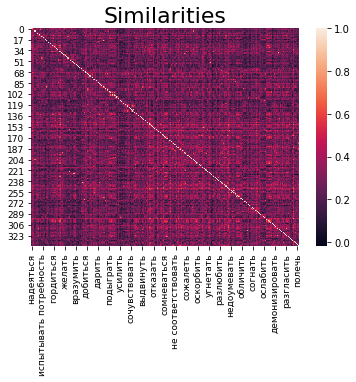

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(sims)

# Decorations
plt.title('Similarities', fontsize=22)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [0]:
pos_vec = get_vec(pos_0)

In [0]:
neg_vec = get_vec(neg_0)

In [0]:
len(pos_vec), len(neg_vec)

(10, 10)

In [0]:
test_set_0 = []
for verb in sent_df.verbs:
  if verb in neg_0 or verb in pos_0:
    continue
  else:
    test_set_0.append(verb)

In [0]:
len(test_set_0)

321

In [0]:
test_vec = get_vec(test_set_0)

In [0]:
len(test_vec)

268

In [0]:
pos_sims = get_sims([x[1] for x in pos_vec], test_vec)

In [0]:
neg_sims = get_sims([x[1] for x in neg_vec], test_vec)

In [0]:
len(pos_sims.keys()), len(neg_sims.keys())

(268, 268)

In [0]:
#надеяться

In [0]:
max(pos_sims['надеяться']), max(neg_sims['надеяться'])

(0.45851263, 0.43338642)

In [0]:
polars = {}
for i in pos_sims.keys():
  polar = 0
  for j in range(len(pos_sims[i])):
    ps = pos_sims[i][j]
    ns = neg_sims[i][j]
    if ps >= ns:
      polar += 1
    else:
      polar -= 1
  if polar > 0:
    sent = 'pos'
  elif polar < 0:
    sent = 'neg'
  else:
    sent = 'neut'
  
  polars[i] = sent

In [0]:
true = 0
false = 0
for i in range(len(sent_df.verbs)):
  verb = sent_df.verbs[i]
  if verb in polars.keys():
    if polars[verb] == sent_df.polar[i]:
      true += 1
    else:
      false += 1

In [0]:
true, false

(163, 105)

In [0]:
true = 0
false = 0
for i in range(len(sent_df.verbs)):
  verb = sent_df.verbs[i]
  if verb in polars.keys():
    if sent_df.pos_num[i] > sent_df.neg_num[i]:
      sent = 'pos'
    if sent_df.pos_num[i] < sent_df.neg_num[i]:
      sent = 'neg'
    if sent_df.pos_num[i] == sent_df.neg_num[i]:
      sent = 'neut'

    if sent == polars[verb]:
      true += 1
    else:
      false += 1

In [0]:
true, false

(95, 173)

# про вектора (модель 1)

53 основных глагола без векторов

In [0]:
all_verbs_2 = list(sent_df_2.verbs)
verb_vec_2 = get_vec(all_verbs_2)

In [0]:
len(verb_vec_2)

3257

2568 всех глаголов без векторов

In [0]:
no_vecs = []
for i in sent_df.verbs:
  k = 0
  if i not in [x[0] for x in verb_vec]:
    if i in verb_vars.keys():
      num_vars = len(verb_vars[i])
      for j in verb_vars[i]:
        if j not in [x[0] for x in verb_vec_2]:
          k += 1
      if k == num_vars:
        no_vecs.append(i)

In [0]:
len(no_vecs)

2

2 глагола без векторов вообще (ни для слова, ни для вариантов)

# черновик

In [0]:
'''if pos == 0 and neg != 0:
    chi_res.append(0)
    chi_res.append(3)
    log_res.append(0)
    log_res.append(3)
  elif neg == 0 and pos != 0:
    chi_res.append(3)
    chi_res.append(0)
    log_res.append(3)
    log_res.append(0)
  elif pos == 0 and neg == 0:
    chi_res.append(0)
    chi_res.append(0)
    chi_res.append(3)
    log_res.append(0)
    log_res.append(0)
    log_res.append(3)
  else:
    a = pos
    b = neg
    c = pos_total - pos
    d = neg_total - neg
    chi1, p1 = get_chi(a,b,c,d)
    log1, p2 = get_chi(a,b,c,d, l = 'log')
    chi_res.append(chi1)
    log_res.append(log1)
    p1_res.append(p1)
    p2_res.append(p2)

    a = neg
    b = pos
    c = neg_total - neg
    d = pos_total - pos
    chi1, p1 = get_chi(a,b,c,d)
    log1, p2 = get_chi(a,b,c,d, l = 'log')
    chi_res.append(chi1)
    log_res.append(log1)
    p1_res.append(p1)
    p2_res.append(p2)'''

# первые тесты с сидами различных размеров

In [0]:
pos_list, pos_list_vec = get_vec(pl)
len(pl), len(pos_list), len(pos_list_vec)

(2615, 1605, 1605)

In [0]:
from sklearn.model_selection import train_test_split

tr_ts, pos_seed, tr_ts_vec, pos_seed_vec = train_test_split(pos_list, pos_list_vec, test_size=0.1, random_state=42, shuffle=True)
pos_train, pos_test, pos_train_vec, pos_test_vec = train_test_split(tr_ts, tr_ts_vec, test_size=0.3, random_state=42, shuffle=True)

In [0]:
print('Seed len:', len(pos_seed), len(pos_seed_vec))
print('Train len:', len(pos_train), len(pos_train_vec))
print('Test len:', len(pos_test), len(pos_test_vec))

Seed len: 161 161
Train len: 1010 1010
Test len: 434 434


In [0]:
def get_sims(seed, train_verb, train_vec):
  sims_all = {}
  for i in range(len(train_vec)):
    sims = []
    v1 = train_vec[i]

    for j in range(len(seed)):
      v2 = seed[j]
      sim = cossim(v1,v2)
      sims.append(sim)

    sims_all[train_verb[i]] = sims

  return sims_all

In [0]:
train_sims = get_sims(pos_seed_vec, pos_train, pos_train_vec)

In [0]:
max(train_sims['дарить'])

0.99999994

In [0]:
for i in train_sims.keys():
  train_sims[i].sort(reverse=True)

In [0]:
train_sims['дарить'][:5]

[0.99999994, 0.529982, 0.45092636, 0.4469396, 0.44265136]

In [0]:
maxs = []
for i in train_sims.keys():
  maxs.append(train_sims[i][0])

In [0]:
max(maxs)

1.0000001

In [0]:
min_num = int(len(train_sims['дарить'])*0.04)
min_num

6

In [0]:
train_sims['дарить'][:min_num]

[0.99999994, 0.529982, 0.45092636, 0.4469396, 0.44265136, 0.44223115]

In [0]:
threshold = 0.6

In [0]:
def get_cands(train_sims, min_num, threshold):
  pos_cands = {}
  for i in list(train_sims.keys()):
    p = 0
    check_sum = 0
    #print(train_sims[i][:min_num])
    for j in train_sims[i][:min_num]:
      check_sum += j
      if j >= threshold:
        p+=1
    #print(p, check_sum)
    if p == min_num or check_sum >= 4:
      pos_cands[i] = train_sims[i]
  return pos_cands

In [0]:
pos_cands = get_cands(train_sims, min_num, threshold)

In [0]:
print(len(pos_cands.keys()), pos_cands.keys())

5 dict_keys(['отступиться', 'благодарить', 'стосковаться', 'воссоединиться', 'благословить'])


In [0]:
def dop(pos_cands):
  pos_cands_dop = {}
  for i in pos_cands.keys():
    s = sum(pos_cands[i])
    pos_cands_dop[i] = s/len(pos_cands[i])
  return pos_cands_dop

In [0]:
pos_cands_sort = list(dop(pos_cands).items())
pos_cands_sort.sort(key=lambda i: i[1], reverse = True)
pos_cands_sort

[('стосковаться', 0.31898560624870453),
 ('воссоединиться', 0.2873345666235278),
 ('отступиться', 0.27660549302463944),
 ('благодарить', 0.27005999137340864),
 ('благословить', 0.26731750475508825)]

In [0]:
tr_ts_2, pos_seed_2, tr_ts_vec_2, pos_seed_vec_2 = train_test_split(pos_list, pos_list_vec, test_size=0.2, random_state=42, shuffle=True)
pos_train_2, pos_test_2, pos_train_vec_2, pos_test_vec_2 = train_test_split(tr_ts_2, tr_ts_vec_2, test_size=0.3, random_state=42, shuffle=True)

print('Seed len:', len(pos_seed_2), len(pos_seed_vec_2))
print('Train len:', len(pos_train_2), len(pos_train_vec_2))
print('Test len:', len(pos_test_2), len(pos_test_vec_2))

Seed len: 321 321
Train len: 898 898
Test len: 386 386


In [0]:
train_sims_2 = get_sims(pos_seed_vec_2, pos_train_2, pos_train_vec_2)

In [0]:
for i in train_sims_2.keys():
  train_sims_2[i].sort(reverse=True)

In [0]:
maxs = []
for i in train_sims_2.keys():
  maxs.append(train_sims_2[i][0])

max(maxs)

1.0000001

In [0]:
pos_cands_2 = get_cands(train_sims_2, min_num, threshold)

In [0]:
len(pos_cands_2)

32

In [0]:
pos_cands_sort_2 = list(dop(pos_cands_2).items())
pos_cands_sort_2.sort(key=lambda i: i[1], reverse = True)
pos_cands_sort_2[:5]

[('стосковаться', 0.3222835490311789),
 ('хвалиться', 0.3167765688998306),
 ('огорчаться', 0.3081909583016905),
 ('разволноваться', 0.3058200694179609),
 ('печалиться', 0.30107900127913584)]

In [0]:
def inter(c1,c2):
  inter = []
  for i in c1:
    if i in c2:
      inter.append(i)
  return inter

In [0]:
intersection = inter(pos_cands.keys(), pos_cands_2.keys())

In [0]:
len(intersection)

4

In [0]:
intersection

['отступиться', 'стосковаться', 'воссоединиться', 'благословить']

In [0]:
comper = []
for i in intersection:
  comper.append([i, dop(pos_cands)[i], dop(pos_cands_2)[i]])

In [0]:
comper

[['отступиться', 0.27660549302463944, 0.26957220642180457],
 ['стосковаться', 0.31898560624870453, 0.3222835490311789],
 ['воссоединиться', 0.2873345666235278, 0.275083728088211],
 ['благословить', 0.26731750475508825, 0.2620518011421058]]

In [0]:
tr_ts_3, pos_seed_3, tr_ts_vec_3, pos_seed_vec_3 = train_test_split(pos_list, pos_list_vec, test_size=0.3, random_state=42, shuffle=True)
pos_train_3, pos_test_3, pos_train_vec_3, pos_test_vec_3 = train_test_split(tr_ts_3, tr_ts_vec_3, test_size=0.3, random_state=42, shuffle=True)

print('Seed len:', len(pos_seed_3), len(pos_seed_vec_3))
print('Train len:', len(pos_train_3), len(pos_train_vec_3))
print('Test len:', len(pos_test_3), len(pos_test_vec_3))

Seed len: 482 482
Train len: 786 786
Test len: 337 337


In [0]:
train_sims_3 = get_sims(pos_seed_vec_3, pos_train_3, pos_train_vec_3)

for i in train_sims_3.keys():
  train_sims_3[i].sort(reverse=True)

maxs = []
for i in train_sims_3.keys():
  maxs.append(train_sims_3[i][0])
max(maxs)

1.0000001

In [0]:
pos_cands_3 = get_cands(train_sims_3, min_num, threshold)
len(pos_cands_3)

75

In [0]:
pos_cands_sort_3 = list(dop(pos_cands_3).items())
pos_cands_sort_3.sort(key=lambda i: i[1], reverse = True)
pos_cands_sort_3[:5]

[('втюриться', 0.32502558409657595),
 ('переволноваться', 0.3229726041160926),
 ('поволноваться', 0.3200778345813148),
 ('стосковаться', 0.31809729546370347),
 ('бахвалиться', 0.314337917723349)]

In [0]:
intersection_2 = inter(intersection, pos_cands_3.keys())
len(intersection_2), intersection_2

(2, ['стосковаться', 'воссоединиться'])

In [0]:
comper_2 = []
for i in intersection_2:
  comper_2.append([i,  dop(pos_cands)[i], dop(pos_cands_2)[i], dop(pos_cands_3)[i]])

for i in comper_2:
  print(i)

['стосковаться', 0.31898560624870453, 0.3222835490311789, 0.31809729546370347]
['воссоединиться', 0.2873345666235278, 0.275083728088211, 0.2746151023741456]


In [0]:
intersection_1_3 = inter(pos_cands.keys(), pos_cands_3.keys())
intersection_2_3 = inter(pos_cands_2.keys(), pos_cands_3.keys())
len(intersection_1_3), len(intersection_2_3)

(2, 15)